## Final Project Submission

Please fill out:
* Student name: Yvonne Kamari
* Student pace: Part Time
* Scheduled project review date/time: 21/07/2023
* Instructor name: Asha Deen
* Blog post URL:


# MICROSOFT MOVIE VENTURE ANALYSIS

# Overview

This project analyzes movie trends and success against various metrics such as earnings, profit, genre and ratings. Understanding and analysis of the feature relationships indicates that while the number of movie releases is on a downward trajectory, sequels are becoming and increasingly popular way for production studios to grow their revenue. While the movie industry's massive earnings have long been attributed to success overseas, foreign markets have seemingly been affected by economic factors hampering their performance. Luckily we have seen the domestic market some in strong to try and fill in the gap. Microsoft can use this analysis to determine the category of movies to produce, markets to target and budgetary allocation for their productions. 

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 

Using data from Box Office Mojo, The Numbers, IMDB and The Movie Database I discuss and illustrate the patterns in movie release trends, box office revenue, ratings and popular genres to aid in Microsoft's decision on what type of films to create.

# Install & Importing the Required Libraries

In [1]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Import Pandas, Numpy and Matplotlib and Seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the Data into a Data Frame

In [4]:
# Read the compressed CSV data files into a data frame.
bom_gross_earnings_df = pd.read_csv(r"C:\Users\user\Documents\Moringa\phase_1\PROJECT\dsc-phase-1-project\zippedData\bom.movie_gross.csv.gz")
imbd_tite_basics_df = pd.read_csv(r"C:\Users\user\Documents\Moringa\phase_1\PROJECT\dsc-phase-1-project\zippedData\imdb.title.basics.csv.gz")
tmdb_movies_df = pd.read_csv(r"C:\Users\user\Documents\Moringa\phase_1\PROJECT\dsc-phase-1-project\zippedData\tmdb.movies.csv.gz", index_col=0)
tn_movie_budgets_df = pd.read_csv(r"C:\Users\user\Documents\Moringa\phase_1\PROJECT\dsc-phase-1-project\zippedData\tn.movie_budgets.csv.gz")

# 1. Exploring the Box Office Mojo & The Numbers Datasets

Box Office Mojo and The Numbers are American websites that track and maintain comprehensive information related to movies including but not limited to box office revenue, budgets, historical data, and movie performance on opening weekend.

### Box Office Mojo

This data set contains 3387 movies from 2010 to 2018 and includes information on the various movie titles, domestic gross earnings, foreign gross earnings and year of release.

In [5]:
bom_gross_earnings_df.head(3)

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010

### The Numbers

This data set contains 5782 movies from Apr 1, 1975 to Sep 9, 2016 and includes information on the various movie titles, release dates, domestic gross earnings, worldwide gross earnings and production budgets.

In [6]:
tn_movie_budgets_df.head(3)

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350

#### * We will merge the above to analyze the fiancials

# Merging the Datasets

We merge the Box Office Mojo (BOM) and The Numbers (TN) datasets for feature engineering and to enable us analyse the financial performance of movie releases and stusios within the period. We choose to merge the datasets on the BOM 'title' column and TN 'movie' column in order to retain BOM's 'title' and 'studio' columns and use the 'release_date', 'production_budget', 'domestic_gross' and 'worldwide_gross' columns. We however choose to drop the 'movie' column to retain 'title'.

We will inspect, clean and analyze this dataset and exclude any data that may adversely impact the results of our analysis.

In [7]:
# Selecting the required columns from each data frame
bom_selected_columns = bom_gross_earnings_df[['title', 'studio']]
tn_selected_columns = tn_movie_budgets_df[['movie', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [8]:
# Merging the data frames on the common column 'title'
earnings_df = bom_selected_columns.merge(tn_selected_columns, left_on='title', right_on='movie')

# Drop the 'movie' column (used for merging)
earnings_df = earnings_df.drop(columns=['movie'])

# Data Inspection

In [9]:
earnings_df.head()

title studio  release_date production_budget  \
0                 Toy Story 3     BV  Jun 18, 2010      $200,000,000   
1                   Inception     WB  Jul 16, 2010      $160,000,000   
2         Shrek Forever After   P/DW  May 21, 2010      $165,000,000   
3  The Twilight Saga: Eclipse   Sum.  Jun 30, 2010       $68,000,000   
4                  Iron Man 2   Par.   May 7, 2010      $170,000,000   

  domestic_gross worldwide_gross  
0   $415,004,880  $1,068,879,522  
1   $292,576,195    $835,524,642  
2   $238,736,787    $756,244,673  
3   $300,531,751    $706,102,828  
4   $312,433,331    $621,156,389

In [10]:
earnings_df.tail()

title studio  release_date production_budget  \
1242                       Gotti     VE  Jun 15, 2018       $10,000,000   
1243                 Ben is Back  RAtt.   Dec 7, 2018       $13,000,000   
1244  Bilal: A New Breed of Hero     VE   Feb 2, 2018       $30,000,000   
1245                       Mandy    RLJ  Sep 14, 2018        $6,000,000   
1246                Lean on Pete    A24   Apr 6, 2018        $8,000,000   

     domestic_gross worldwide_gross  
1242     $4,286,367      $6,089,100  
1243     $3,703,182      $9,633,111  
1244       $490,973        $648,599  
1245     $1,214,525      $1,427,656  
1246     $1,163,056      $2,455,027

In [11]:
# Find the shape of our dataset
earnings_df.shape

print("Number of Rows:", earnings_df.shape[0])
print("Number of Columns:", earnings_df.shape[1])

Number of Rows: 1247
Number of Columns: 6


In [12]:
# Display summary information about the dataframe
earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              1247 non-null   object
 1   studio             1246 non-null   object
 2   release_date       1247 non-null   object
 3   production_budget  1247 non-null   object
 4   domestic_gross     1247 non-null   object
 5   worldwide_gross    1247 non-null   object
dtypes: object(6)
memory usage: 68.2+ KB


We make the following observations:
* There are a total of 1247 entries (equal to our number of rows) and 6 columns 
* All columns are of object datatype
* There appears to only be one missing value in the data
* To enable us perform analysis on the "production_budget" "domestic_gross" and "worldwide_gross" columns, we will need to convert them to integer datatype.
* Likewise we need to convert the release date column to datetime format

Let us check to see if our observations are true, and clean the data if so.

In [13]:
# Confirm whether there are missing values in the dataframe
print("Are there missing values in the dataframe?", 
      earnings_df.isnull().values.any())

Are there missing values in the dataframe? True


In [14]:
# Sum the total missing values in each column
earn_miss_values = earnings_df.isnull().sum()
earn_miss_values 

title                0
studio               1
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

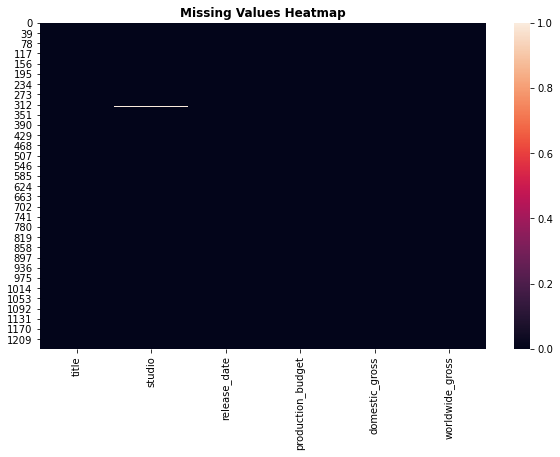

In [15]:
# Plot missing values on a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(earnings_df.isnull())
plt.title("Missing Values Heatmap", fontweight='bold')

plt.show()

title                0.000000
studio               0.080192
release_date         0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
dtype: float64


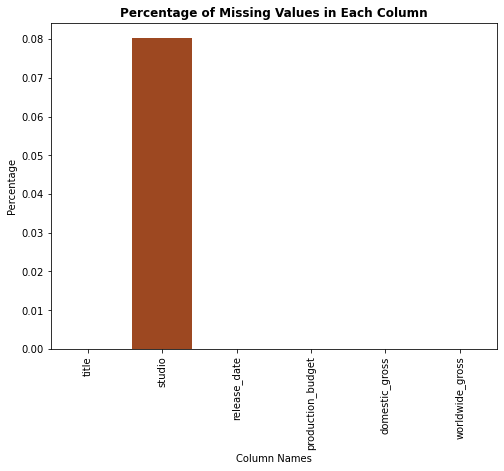

In [16]:
# Find the percentage of missing values in each column
perc_msng_values = earnings_df.isnull().sum()\
                    * 100 / len (earnings_df)
print(perc_msng_values) 

# Plot the percentage of missing values in a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=perc_msng_values.index, y=perc_msng_values.values, palette='dark')
plt.title("Percentage of Missing Values in Each Column", fontweight='bold')
plt.ylabel("Percentage", fontweight='bold')
plt.xlabel("Column Names", fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [17]:
# Identify the row with the null value
earnings_df[earnings_df.isna().any(axis=1)]

title studio  release_date production_budget  \
322  Fireflies in the Garden    NaN  Oct 14, 2011        $8,000,000   

    domestic_gross worldwide_gross  
322        $36,884      $3,587,191

In [18]:
# Check for duplicates
earn_dup_values = earnings_df.duplicated().any()
print("Are there any duplicate values?", earn_dup_values)

Are there any duplicate values? False


The findings are as follows:

* The "studio" column has 1 missing entry equivalent to 0.80% of the column's total entries.
* There are no duplicate values in the data frame.

# Data Cleaning and Preparation

In this next section we will deal with,
* replacing the missing value in the studio column,
* converting the "production_budget", "domestic_gross" and "worldwide_gross" columns from object to interger datatype
* coverting the "release_date" column to datetime format

## Replacing the missing value in the studio column

Upon doing some quick research on the movie 'Flies in the Garden' I found that it is a Sony Pictures production. Given that it is only one missing value, I thought it best in order to maintain as much data in our data set, to look up the unique values in the studio column and replace the missing value with 'Sony' as captured in our data. 

In [19]:
# Find unique values in studio column
earnings_df['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS',
       'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'Focus', 'MGM',
       'Over.', 'Mira.', 'NM', 'CBS', 'SPC', 'ParV', 'Gold.', 'RAtt.',
       'Magn.', 'IFC', 'Free', '3D', 'Wein.', 'Rela.', 'Anch.', 'App.',
       'Drft.', 'IW', 'Relbig.', 'Viv.', 'Eros', 'Scre.', 'UTV', 'Kino',
       'ATO', 'First', 'GK', 'NFC', 'Strand', 'Mont.', 'IVP', 'FD',
       'TriS', 'ORF', 'Jan.', 'Osci.', 'OMNI/FSR', nan, 'SMod', 'WHE',
       'P4', 'ALP', 'LG/S', 'RTWC', 'MNE', 'LD', 'Yash', 'IM', 'A24',
       'PH', 'EOne', 'ELS', 'CE', 'Saban', 'DR', 'Trib.', 'KE', 'VE',
       'EC', 'BG', 'PFR', 'BST', 'BH Tilt', 'BSC', 'FCW', 'Cohen', 'LGP',
       'TFA', 'Alc', 'STX', 'Orch.', 'PNT', 'CJ', 'Cleopatra', 'BBC',
       'GrtIndia', 'Neon', 'Affirm', 'ENTMP', 'Studio 8', 'Annapurna',
       'Global Road', 'Amazon', 'RLJ'], dtype=object)

In [20]:
# Replace the null value in studio with Sony
earnings_df["studio"].fillna("Sony", inplace = True)

## Converting the data types

* We use the .str.replace() function to remove the dollar sign and commas ('$', ',') from each value in the "production_budget", "domestic_gross" and "worldwide_gross" columns to ensure that the columns are converted to the integer data type. 
* Thereafter we use .astype(int) i.e., the astype() function to convert the cleaned columns' values to the integer data type.
* Next we use the pd.to_datetime() function to convert values in the "release_date" column from string data type to pandas datetime objects

In [21]:
# Convert production_budget from object to integer
earnings_df["production_budget"] = earnings_df["production_budget"]\
        .str.replace("$", "").str.replace(",", "").astype(int)

In [22]:
# Convert production_budget from object to integer
earnings_df["domestic_gross"] = earnings_df["domestic_gross"].str.replace("$", "")\
        .str.replace(",", "").astype(int)

In [23]:
# Convert worldwide_gross from object to integer
earnings_df["worldwide_gross"] = earnings_df["worldwide_gross"].str.replace("$", "")\
        .str.replace(",", "").astype(int)

In [24]:
# Convert release_date to datetime
earnings_df['release_date'] = pd.to_datetime(earnings_df['release_date'])

# Derive New Features

We create the gross_profit feature to analyze earnings net production costs.

In [25]:
# Create a new column 'gross_profit' which is the difference between worldwide_gross and production_budget
earnings_df['gross_profit']= earnings_df['worldwide_gross'] - earnings_df['production_budget']

In [26]:
earnings_df.head(3)

title studio release_date  production_budget  domestic_gross  \
0          Toy Story 3     BV   2010-06-18          200000000       415004880   
1            Inception     WB   2010-07-16          160000000       292576195   
2  Shrek Forever After   P/DW   2010-05-21          165000000       238736787   

   worldwide_gross  gross_profit  
0       1068879522     868879522  
1        835524642     675524642  
2        756244673     591244673

We create the foreign_profit feature to analyze earnings outside North America.

In [27]:
# Create a new column 'foreign_gross' which is the difference between worldwide_gross and domestic_gross
earnings_df['foreign_gross']= earnings_df['worldwide_gross'] - earnings_df['domestic_gross']

In [28]:
earnings_df.head(3)

title studio release_date  production_budget  domestic_gross  \
0          Toy Story 3     BV   2010-06-18          200000000       415004880   
1            Inception     WB   2010-07-16          160000000       292576195   
2  Shrek Forever After   P/DW   2010-05-21          165000000       238736787   

   worldwide_gross  gross_profit  foreign_gross  
0       1068879522     868879522      653874642  
1        835524642     675524642      542948447  
2        756244673     591244673      517507886

We create the seasons feature to analyze seasonal movie releases.

In [29]:
# Create a new column 'season'
earnings_df['season'] = earnings_df['release_date'].dt.month\
                        .apply(lambda x: 'winter' if x in [12, 1, 2] else 'spring' 
               if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall')

In [30]:
earnings_df.head(3)

title studio release_date  production_budget  domestic_gross  \
0          Toy Story 3     BV   2010-06-18          200000000       415004880   
1            Inception     WB   2010-07-16          160000000       292576195   
2  Shrek Forever After   P/DW   2010-05-21          165000000       238736787   

   worldwide_gross  gross_profit  foreign_gross  season  
0       1068879522     868879522      653874642  summer  
1        835524642     675524642      542948447  summer  
2        756244673     591244673      517507886  spring

We create a new column/feature 'year' for year on year analysis. 

We choose to create a new 'year' column and fill in the data using this method instead of including 'year' column from the Box Office Mojo dataset when merging it with The Numbers data frame because our dataset contains movie sequels with identical names and simply merging the data frames would result in pandas filling in the year column for such entries with the year entry for the title name in the Box Office Mojo dataset. This would therefore result in the incorrect year being captured.

In [31]:
# Create a new column 'year'
earnings_df['year'] = earnings_df['release_date'].dt.year
earnings_df.head(3)

title studio release_date  production_budget  domestic_gross  \
0          Toy Story 3     BV   2010-06-18          200000000       415004880   
1            Inception     WB   2010-07-16          160000000       292576195   
2  Shrek Forever After   P/DW   2010-05-21          165000000       238736787   

   worldwide_gross  gross_profit  foreign_gross  season  year  
0       1068879522     868879522      653874642  summer  2010  
1        835524642     675524642      542948447  summer  2010  
2        756244673     591244673      517507886  spring  2010

## Filtering the Dataframe

Taking cognisance of the limited data for the years 1967 to 2006, we will filter our data frame to the years 2010 to 2018 to perform the vast majority of our analysis.

In [32]:
earnings_df[earnings_df['year'] < 2010]

title studio release_date  production_budget  \
10       The Karate Kid   Sony   1984-06-22            8000000   
235             Unknown     WB   2006-11-03            3700000   
311         Point Blank  Magn.   1967-09-18            3000000   
461   Playing for Keeps     FD   1986-10-03           35000000   
716         The Gambler   Par.   1999-08-04            3000000   
752             Jackpot     DR   2001-07-27             400000   
797      Fantastic Four    Fox   2005-07-08           87500000   
848              Legend   Uni.   1986-04-18           25000000   
1049          Evolution    IFC   2001-06-08           80000000   
1152     City of Ghosts    IFC   2003-04-25           17500000   
1153        The Journey    IFC   2003-07-11             500000   

      domestic_gross  worldwide_gross  gross_profit  foreign_gross  season  \
10          90815558         90815558      82815558              0  summer   
235            26403          3355048       -344952        3328645    fall   
311                0                0      -3000000              0    fall   
461          2000000          2000000     -33000000              0    fall   
716            51773           101773      -2898227          50000  summer   
752            44452            44452       -355548              0  summer   
797        154696080        333132750     245632750      178436670  summer   
848         15502112         23506237      -1493763        8004125  spring   
1049        38311134         98341932      18341932       60030798  summer   
1152          325491           325491     -17174509              0  spring   
1153           19800            19800       -480200              0  summer   

      year  
10    1984  
235   2006  
311   1967  
461   1986  
716   1999  
752   2001  
797   2005  
848   1986  
1049  2001  
1152  2003  
1153  2003

In [33]:
# Filter the DataFrame to include only the rows with years from 2010 to 2018 (inclusive)
earnings_df_filtered = earnings_df.copy()[(earnings_df['year'] >= 2010) & (earnings_df['year'] <= 2018)]

In [34]:
# Reset the index without inserting an additional index column
earnings_df_filtered.reset_index(drop=True, inplace=True)

Checking the overall summary information of our data, we now observe that,
* There are a total of 1236 entries (equal to our number of rows) and 10 columns 
* Our column entries are all of the correct data type
* There are no missing values

In [35]:
# Display summary information about the dataframe
earnings_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1236 non-null   object        
 1   studio             1236 non-null   object        
 2   release_date       1236 non-null   datetime64[ns]
 3   production_budget  1236 non-null   int32         
 4   domestic_gross     1236 non-null   int32         
 5   worldwide_gross    1236 non-null   int32         
 6   gross_profit       1236 non-null   int32         
 7   foreign_gross      1236 non-null   int32         
 8   season             1236 non-null   object        
 9   year               1236 non-null   int64         
dtypes: datetime64[ns](1), int32(5), int64(1), object(3)
memory usage: 72.5+ KB


# Feature Understanding - Univariate Analysis

## Descriptive Statistics

In [36]:
# Set the display format for floating-point numbers to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Display statistics for numeric data
earnings_df_filtered.describe()

production_budget  domestic_gross  worldwide_gross  gross_profit  \
count            1236.00         1236.00          1236.00       1236.00   
mean         47199073.64     60893765.82     153033454.05  105834380.41   
std          56076144.98     84931742.39     235695358.83  194970305.01   
min             50000.00            0.00             0.00 -110450242.00   
25%          10000000.00      7694611.50      18402286.50    2610925.50   
50%          26000000.00     33511863.00      65526562.00   32285365.50   
75%          60000000.00     75607234.00     173051091.25  119732865.75   
max         410600000.00    700059566.00    2048134200.00 1748134200.00   

       foreign_gross    year  
count        1236.00 1236.00  
mean     92139688.23 2013.57  
std     158622242.76    2.54  
min             0.00 2010.00  
25%       6299931.25 2011.00  
50%      28093150.00 2013.00  
75%      98931723.25 2016.00  
max    1369318718.00 2018.00

From the summary descriptive statistics of our data frame, we can deduce the following key information, 

The release years for the movies in our data set range from 2010 to 2018 and have a wide ranging production budget from a minimum of USD 50,000 up to a maximum USD 410,600,000.

It appears that on average most movies earn more from domestic movie sales than foreign movie sales with the average domestic gross earning being USD 60,893,765.82 and the average foreign gross earning being USD 92,139,688.23. However see that the maximum earned by a movie has been from foreign sales being USD 1,369,318,718.00 vs domestic sales of USD 700,059,566.00. Conversely, we also have instances where movies earn nothing at all as we note minimum domestic and foreign earnnings of USD 0.00

Worldwide, the average earning is USD 153,033,454.05 with at least one movie earning a maximum of USD 2,048,134,200.00. Similarly to domestic and foreign earnings we do observe an occurence of at least one movie earning nothing.

Lastly, we observe that on average, the movies in our data frame are profitable with the average profit being USD 105,834,380.41 up to a maximum of USD 17,481,342,000.00. However movies may also make a loss as we note the minimum gross profit earned of USD -110,450,242.00.

## Movie Releases: Annual Trend

There appears to be a downward trend on the number of movies released yearly with the highest number of movies being released in 2010 and the least in 2018. The downward trend is observed consistently from 2010 to 2014 however, there was a slight recovery with the number of releases increasing in 2015. The number of releases the steeply declines from 2016 and slightly more so between 2017 and 2018. 

This trend likely due to the rising popularity of streaming sites such as Netflix and Amazon Prime Video that gave viewers access to box office movies and television series at the comfort of their homes.

We get a better look at the number of releases per year by looking at the year value counts below.

2010    181
2011    163
2015    145
2012    143
2016    141
2013    139
2014    126
2017    100
2018     95
Name: year, dtype: int64


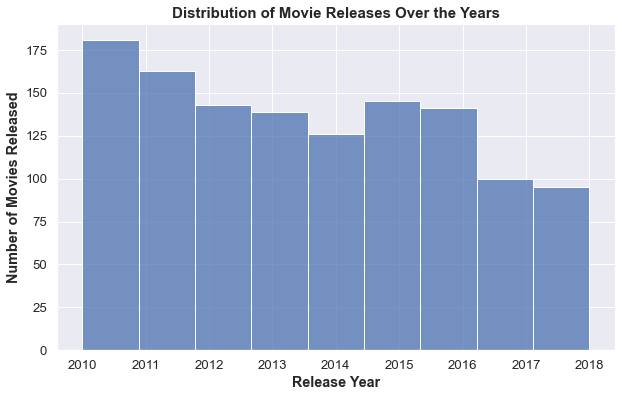

In [195]:
# Trend of movie releases over the years
print(earnings_df_filtered['year'].value_counts().sort_values(ascending=False))

#Plot the distribution (yearly trend) of movie releases
plt.figure(figsize=(10, 6))
sns.histplot(earnings_df_filtered['year'], kde=False, bins=9)
plt.title('Distribution of Movie Releases Over the Years', fontsize=15, fontweight='bold')
plt.xlabel('Release Year', fontweight='bold')
plt.ylabel('Number of Movies Released', fontweight='bold')

plt.show()

## Movie Releases: Seasonal Distribution

The 4 climate seasons are;
* Spring: March - May
* Summer: June - August
* Autumn: September - November
* Winter: December - February

The distribution of movie releases is negatively skewed. We can observe specific months where movie releases peak through out the year, with the highest period being between October to November, followed by June to July and March to April. We further categorize the release periods into months and note that releases are highest around the fall as we approach the Christmas period and again slightly during the summer holiday period. The least number of movies release is in the winter, likey due to the fact that people may prefer to stay indoors while it is cold/snowing out instead of going to the movie theatre to catch a movie.

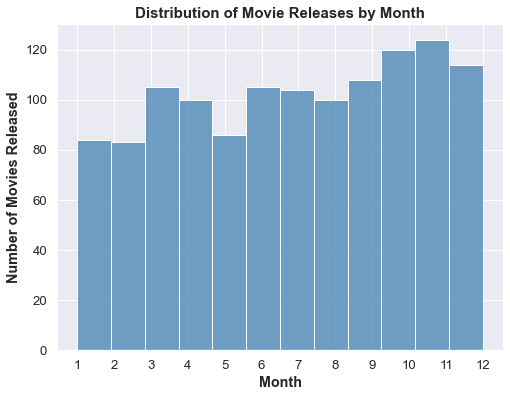

In [194]:
# Plot the Seasonality Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=earnings_df_filtered, x=earnings_df_filtered['release_date'].dt.month, bins=12, color='steelblue')
plt.title('Distribution of Movie Releases by Month', fontsize=15, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Movies Released', fontweight='bold')
plt.xticks(range(1, 13))

plt.show()

fall      352
summer    309
spring    291
winter    281
Name: season, dtype: int64


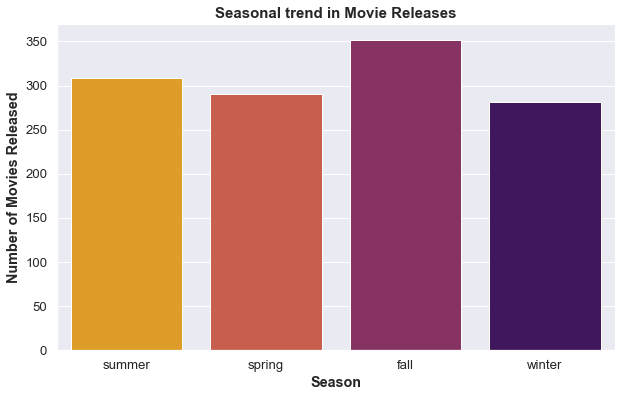

In [193]:
# Count the occurences of movies realeased in each season
print(earnings_df_filtered['season'].value_counts())

# Plot the distribution of the season column
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=earnings_df_filtered, palette='inferno_r')
plt.title('Seasonal trend in Movie Releases', fontsize=15, fontweight='bold')
plt.xlabel('Season', fontweight='bold')
plt.ylabel('Number of Movies Released', fontweight='bold')

plt.show()

## Production Budget: Distribution

In terms of budget, the distribution is positively skewed where majority of the movies in our data set appear to have a production budget ranging from USD 50,000.00 - USD 60 million. The box plot identifies the typical range for the minimum and maximum production budget as USD 0.00 and USD 140 million respecively, with production budgets above that range may be considered to be outliers.

Looking at the value counts, the 5 most common budgets in our data are USD 20 million, USD 10 million, USD 40 million, USD 30 million and USD 25 million (in oder of most to least prevelant budget).

20000000     52
10000000     51
40000000     48
30000000     44
5000000      38
             ..
225000000     1
5200000       1
3400000       1
3300000       1
67500000      1
Name: production_budget, Length: 221, dtype: int64


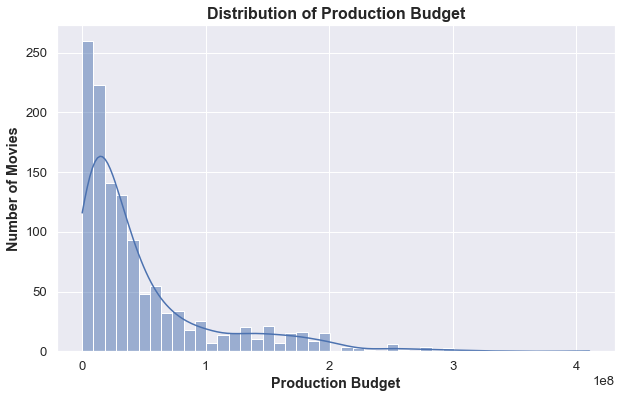

In [191]:
# Print the production budget values
print(earnings_df_filtered['production_budget'].value_counts()\
      .sort_values(ascending=False))

# Plot the distribution of production budget
plt.figure(figsize=(10, 6))
sns.histplot(earnings_df_filtered['production_budget'], kde=True)
plt.title('Distribution of Production Budget', fontsize=16, fontweight='bold')
plt.xlabel('Production Budget', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')
plt.grid(True)

plt.show()

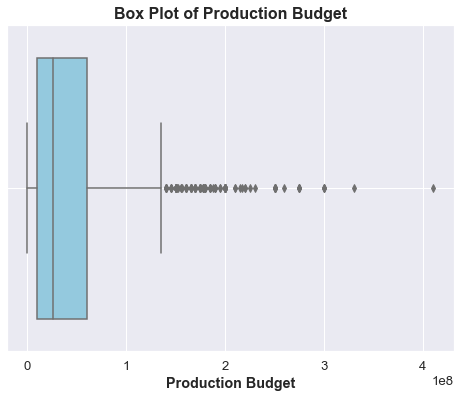

In [192]:
# Plot a box plot for production budget
plt.figure(figsize=(8, 6))
sns.boxplot(data=earnings_df_filtered, x='production_budget', color='skyblue')
plt.title('Box Plot of Production Budget', fontsize=16, fontweight='bold')
plt.xlabel('Production Budget', fontweight='bold')
plt.grid(True)

plt.show()

## Domestic Gross Earnings: Distribution

The distribution of domestic gross earnings is skewed to the right with a bulk of movies in the data set have made domestic earnings ranging from USD 7.4 million - USD 75.5 million. The box plot identifies an earnings range of a minumum of USD 0.00 up to a maximum of aboutUSD 190 million. The domestic earnings above this range may be considered to be outliers. 

Checking the value counts we also identify that 9 movies did not earn any money domestically.

In [42]:
# Print the production budget value counts
print(earnings_df_filtered['domestic_gross'].value_counts())


0            9
20738724     1
68420120     1
29807260     1
113203870    1
            ..
101740       1
148415853    1
44480275     1
56117548     1
17804299     1
Name: domestic_gross, Length: 1228, dtype: int64


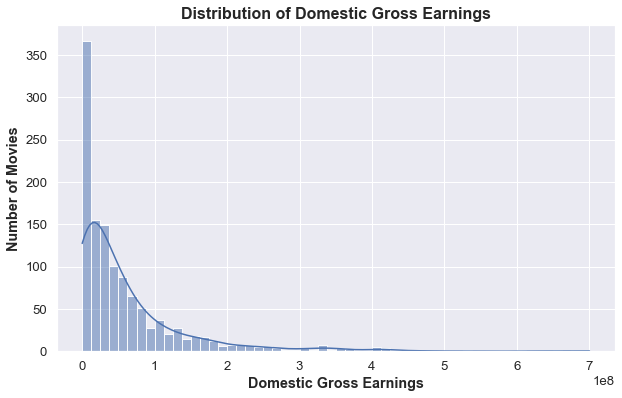

In [43]:
# Plot the distribution of domestic_gross
plt.figure(figsize=(10, 6))
sns.histplot(earnings_df_filtered['domestic_gross'], kde=True)
plt.title('Distribution of Domestic Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Domestic Gross Earnings', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')

plt.show()

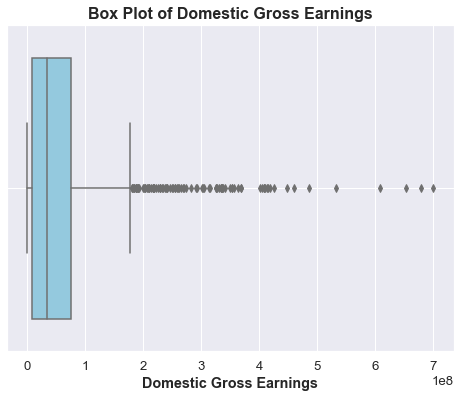

In [44]:
# Plot a box plot for domestic gross earnings
plt.figure(figsize=(8, 6))
sns.boxplot(data=earnings_df_filtered, x='domestic_gross', color='skyblue')
plt.title('Box Plot of Domestic Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Domestic Gross Earnings', fontweight='bold')
plt.grid(True)

plt.show()

## Foreign Gross Earnings: Distribution

Foreign gross earnings is also positively skewed. For most of the movies in our dataset ranges from USD 5.9 million - USD 97.8 million. The box plot identifies an earnings range of a minumum of USD 0.00 up to a maximum of aboutUSD 190 million. The domestic earnings above this range may be considered to be outliers.

Checking the value counts we also identify that 19 movies did not earn any money overseas while a couple of movies made similar earnings from overseas.

In [45]:
# Print the foreign budget value counts
print(earnings_df_filtered['foreign_gross'].value_counts())

0            19
111200000     2
58100000      2
10000000      2
49000000      2
             ..
726349        1
144719        1
185680        1
50855249      1
9606          1
Name: foreign_gross, Length: 1214, dtype: int64


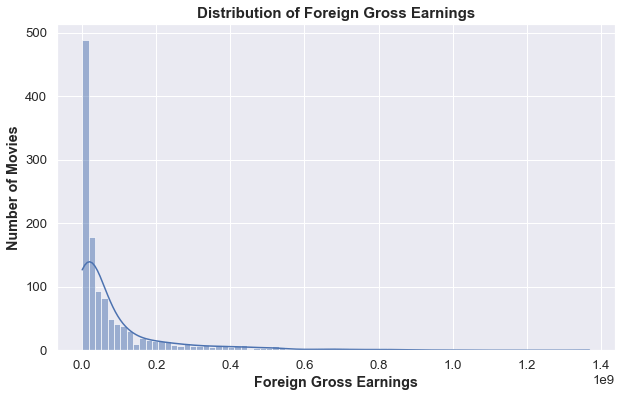

In [196]:
# Plot the distribution of foreign_gross
plt.figure(figsize=(10, 6)) 
sns.histplot(earnings_df_filtered['foreign_gross'], kde=True)
plt.title('Distribution of Foreign Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Foreign Gross Earnings', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')

plt.show()

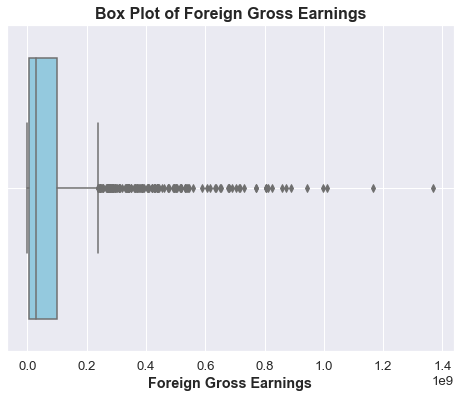

In [47]:
# Plot a box plot for foreign gross earnings
plt.figure(figsize=(8, 6))
sns.boxplot(data=earnings_df_filtered, x='foreign_gross', color='skyblue')
plt.title('Box Plot of Foreign Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Foreign Gross Earnings', fontweight='bold')
plt.grid(True)

plt.show()

## Worldwide Gross Earnings: Distribution

Similary to the domestic and foreign gross earnings distributions, worldwide gross earnings (the sum of the two) is also skewed to the right. We see that majority of movies in our data set earned from USD 18 million to USD 172 million. The box plot identifies the typical range for global earning to be from a minimum of USD 0.00 to a maximum of about USD 300 million. The movies with worldwide earnings beyond the USD 300 million would be considered outliers.

Checking the value counts we also identify that 3 movies did not earn any money either domestically or in foreign markets.

In [48]:
# Print the worldwide gross earnings value counts
print(earnings_df_filtered['worldwide_gross'].value_counts())

0             3
74326015      1
103735965     1
644602516     1
1045663875    1
             ..
1104039076    1
68541786      1
8078683       1
76119388      1
13031424      1
Name: worldwide_gross, Length: 1234, dtype: int64


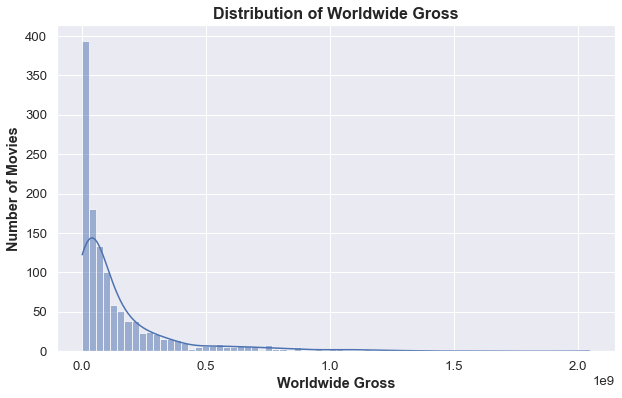

In [49]:
# Plot the distribution of worldwide_gross
plt.figure(figsize=(10, 6))
sns.histplot(earnings_df_filtered['worldwide_gross'], kde=True)
plt.title('Distribution of Worldwide Gross', fontsize=15, fontweight='bold')
plt.xlabel('Worldwide Gross', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')

plt.show()

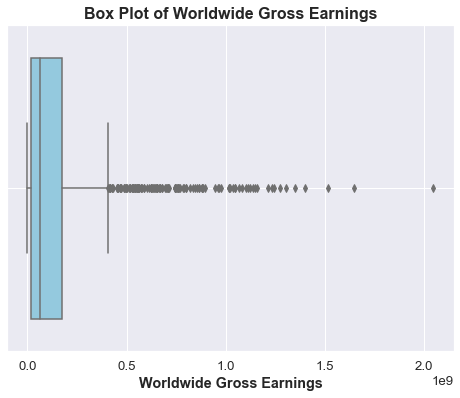

In [50]:
# Plot a box plot for worldwide gross earnings
plt.figure(figsize=(8, 6))
sns.boxplot(data=earnings_df_filtered, x='worldwide_gross', color='skyblue')
plt.title('Box Plot of Worldwide Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Worldwide Gross Earnings', fontweight='bold')
plt.grid(True)

plt.show()

## Gross Profit: Distribution

Gross profit, the difference worldwide earnings and production budget is also comparably poitively skewed. We note that a bulk of the movies in the data set made a fross profit ranging from USD 2.2 million - USD 118.7 million. Looking at the box plot we identify a range for the minimum gross profit being a loss of USD -110.4 million and maximum of about USD 300 million. Those having earned gross profits above this range may be considered outliers.

Filtering for movies with gross profit less than zero, we identify 259 movies having made losses.

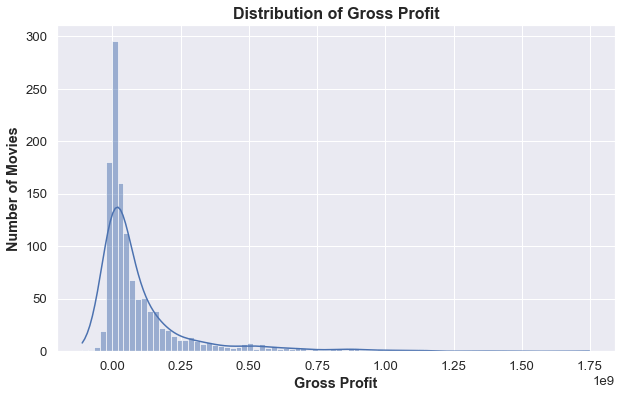

In [51]:
# Plot the distribution of gross_profit
plt.figure(figsize=(10, 6))
sns.histplot(earnings_df_filtered['gross_profit'], kde=True)
plt.title('Distribution of Gross Profit', fontsize=15, fontweight='bold')
plt.xlabel('Gross Profit', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')

plt.show()

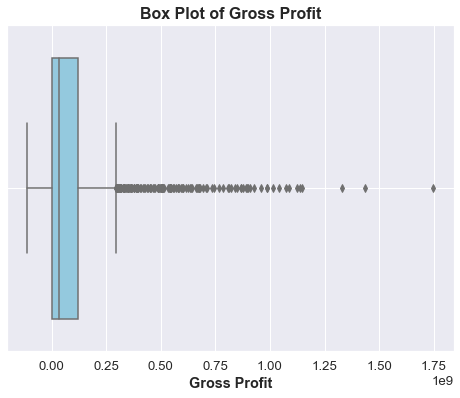

In [52]:
# Plot a box plot for gross profit
plt.figure(figsize=(8, 6))
sns.boxplot(data=earnings_df_filtered, x='gross_profit', color='skyblue')
plt.title('Box Plot of Gross Profit', fontsize=15, fontweight='bold')
plt.xlabel('Gross Profit', fontweight='bold')
plt.grid(True)
plt.show()

In [53]:
# Find the movies having made losses
neg_gross_movies = earnings_df_filtered[earnings_df_filtered['gross_profit'] <= 0][
    ['title', 'studio', 'release_date', 'gross_profit']]

neg_gross_movies

title studio release_date  gross_profit
13                    Robin Hood   Uni.   2018-11-21     -14252559
40                   The Wolfman   Uni.   2010-02-12      -7365642
54                    Green Zone   Uni.   2010-03-12      -2476980
89                         Agora     NM   2010-05-28     -31007708
101                       Splice     WB   2010-06-04      -1457506
...                          ...    ...          ...           ...
1231                       Gotti     VE   2018-06-15      -3910900
1232                 Ben is Back  RAtt.   2018-12-07      -3366889
1233  Bilal: A New Breed of Hero     VE   2018-02-02     -29351401
1234                       Mandy    RLJ   2018-09-14      -4572344
1235                Lean on Pete    A24   2018-04-06      -5544973

[259 rows x 4 columns]

## Dropping the Rows with 0 Values In Domestic & Worldwide Gross Earnings

While the data showed that there are no more missing values, checking the value counts of entires in the domestic_gross and worldwide_gross columns identified some movies having earned USD 0. I therefore took a step to identify the rows with 0 captured in both of these columns and found the 3 movies below.

After researching to see if indeed these movies had earned 0 domestic or worldwide earnings, I found that that was false and made the decision to replace the zeros with NaN and drop the rows to avoid incorrect data capture given that how much each of these movies earned varies depending on which site you check.

In [54]:
# Filter rows with 0 in both 'domestic_gross' and 'foreign_gross' columns
earnings_df_filtered[(earnings_df_filtered['domestic_gross'] == 0) & (earnings_df_filtered['worldwide_gross'] == 0)][['title', 'domestic_gross', 'worldwide_gross']]

title  domestic_gross  worldwide_gross
582  Snitch               0                0
598  Trance               0                0
896    Eden               0                0

In [55]:
# Create a boolean mask for rows with zeros in both 'domestic_gross' and 'worldwide_gross' columns
zero_gross_mask = (earnings_df_filtered['domestic_gross'] == 0) & (earnings_df_filtered['worldwide_gross'] == 0)

In [56]:
# Replace zeros with NaN where the mask is True
earnings_df_filtered.loc[zero_gross_mask, ['domestic_gross', 'worldwide_gross']] = pd.NA

In [57]:
# Drop rows with null values in both 'domestic_gross' and 'worldwide_gross' columns
earnings_df_filtered.dropna(subset=['domestic_gross', 'worldwide_gross'], how='all', inplace=True)

In [58]:
# Reset the index without inserting an additional index column
earnings_df_filtered.reset_index(drop=True, inplace=True)

In [59]:
# Check for missing values in the dataframe
print("Are there missing values in the dataframe?", 
      earnings_df_filtered.isnull().values.any())

Are there missing values in the dataframe? False


Checking the summary information of the dataframe we see that the rows have been dropped but our domestic_gross and worldwide_gross columns entries have been converted to object data types. We convert the entries back to integer data types before we proceed to further analyzing the data.

In [60]:
# Display summary information about the dataframe
earnings_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1233 non-null   object        
 1   studio             1233 non-null   object        
 2   release_date       1233 non-null   datetime64[ns]
 3   production_budget  1233 non-null   int32         
 4   domestic_gross     1233 non-null   object        
 5   worldwide_gross    1233 non-null   object        
 6   gross_profit       1233 non-null   int32         
 7   foreign_gross      1233 non-null   int32         
 8   season             1233 non-null   object        
 9   year               1233 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(1), object(5)
memory usage: 82.0+ KB


In [61]:
# Convert 'domestic_gross' and 'worldwide_gross' back to integer data type
earnings_df_filtered['domestic_gross'] = earnings_df_filtered['domestic_gross'].astype(int)
earnings_df_filtered['worldwide_gross'] = earnings_df_filtered['worldwide_gross'].astype(int)

In [62]:
# # Check if 'season' column has numeric values and convert to integer data type if needed
# if earnings_df_filtered['season'].str.isnumeric().all():
#     earnings_df_filtered['season'] = earnings_df_filtered['season'].astype(int)

# Feature Relationships

## Correlation Between The Features

Our numeric features are all positively correlated with each other to varying degrees with year of movie release being the least correlated with the other features indicating that year of release has little to no impact in terms of budgetary allocation, earnings or profit. 

Production budget has a moderately positive linear realationship with gross profit and strong positive linear relationship with domestic gross earnings, foreign gross earnings and the sum of the two being worldwide gross earning implying that as budgets increase, gross profit and earnings tends to as well and vice vera. We hoever note that there are various factors that go into the suceess of a movie such as the storyline, marketing and cast just to name afew thus correlation does not necessarily mean causation.

Domestic gross earnings has a strong positive linear relationshp with foreign gross earnings and very strong positive linear relationship with worldwide gross earnings as well as gross profit indicating that as dometic gross earnings increase so do these other features (and vice versa) noting that domestic gross earnings are a key contributor to global earnings and profit. The success of a movie in North America may also result in a drive to see the movie oversees thus resulting in increasing foreign earnings.

The above logic is also implied as we look at the correlation between foreign earnings and the other features as well as worldwide earnings. 

It goes without saying that gross profit is stongly positively correlated to earings given that it is the metric that measures the difference between earnings and cost.

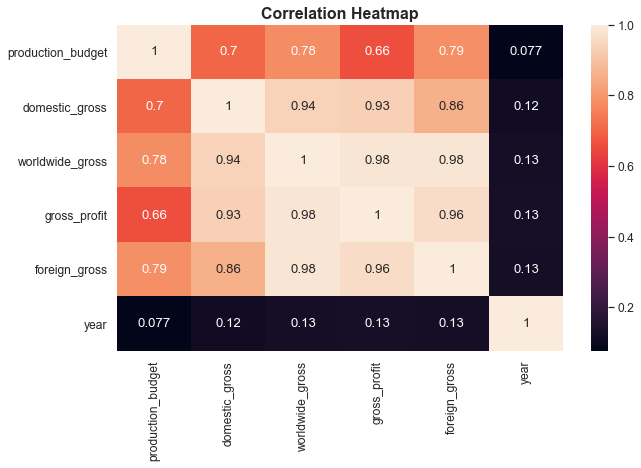

In [63]:
# Plot the correlation between the numeric features
sns.set(font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.heatmap(earnings_df_filtered.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

plt.show()

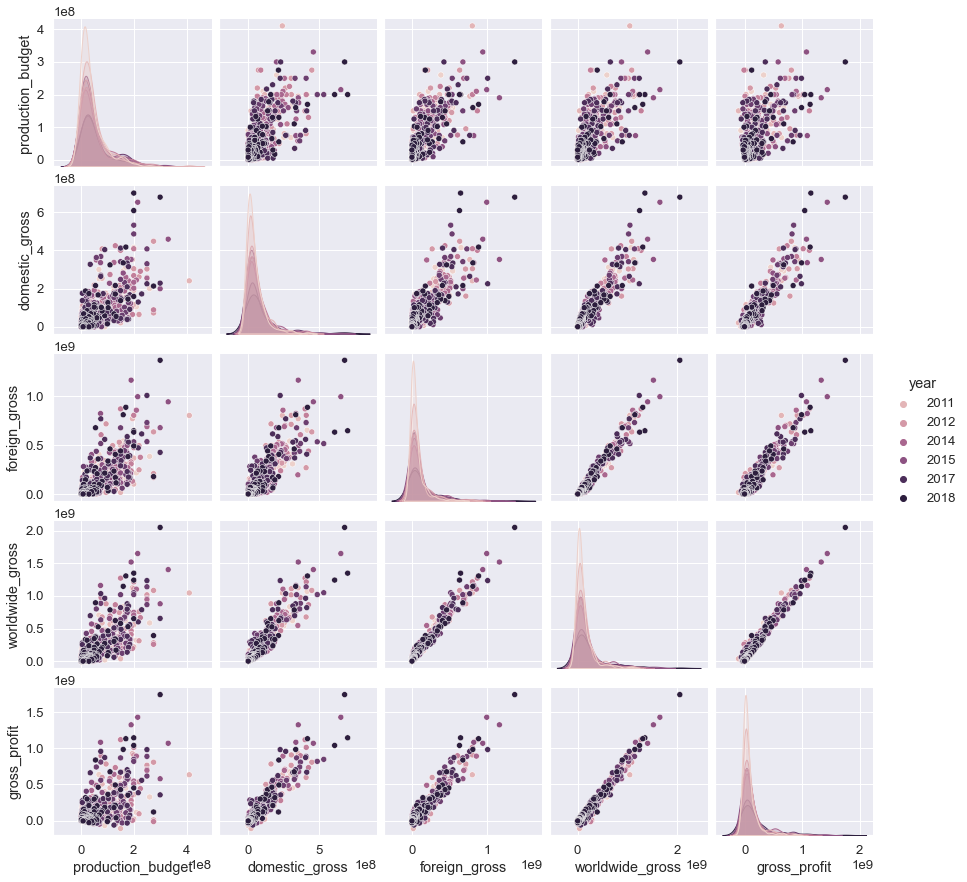

In [64]:
# Display correlation between features on a scatterplot
sns.set(font_scale=1.2)
sns.pairplot(earnings_df_filtered, vars=['production_budget', 'domestic_gross',
                                'foreign_gross', 'worldwide_gross', 'gross_profit'], hue="year")
plt.show()

## Annual Trend Analysis: Domestic, Foreign & Worldwide Earnings

From the annual trend of domestic earnings, we observe a year on year increase in earnings between 2010 to 2013 and 2015 to 2018. A slump in domestic earnings between 2014 & 2015 can be observed, with multiple sources attributing this to fewer blockbuster releases in 2014, uniformity in film franchise strategy and a shrinking North American middle class resulting in reduced ticket sales among other reasons contributed to this dip. 

The rise in domestic earnings there on is heavily accredited to releases quality blokbuseter releases by BV (Buena Vista Pictures now known as Walt Disney Studios Motion Pictures) and WB (Warner Bros Entertainment). 

Foreign gross earnings follows a similar trend to domestic gross earnings with earnings trending upwards between 2010 - 2014 and instead dipping in 2015 and further so in 2016 which may be attributed to slowing down of overseas economies and currency fluctuations, with foreign currencies depreciating against the dollar. One such case is the effect on the pound following the U.K.'s 2016 Brexit vote.

Foreign gross earnings recovered through a steep rise in earnings between 2016 and 2017 which may be ascribed to higher ticket prices, expansion of overseas markets with more cinemas opening in South-East Asian countries such as China and Vietnam.

The trend of worldwide earnings (a combination of domestic and foreign earnings) follows an almost similar trend to the foreign earnings throughtout the years given that foreign earnings is the highest contributor to worldwide earnings through the years. We note however that worldwide earnings does not dip in 2018 as it is cushioned by domestic gross earnings.

We will take a look highest earning movies as we move along.

In [65]:
# Calculate the average domestic_gross per year
average_domestic_gross_per_year = earnings_df_filtered.groupby('year')['domestic_gross'].mean().reset_index()
print(average_domestic_gross_per_year)

   year  domestic_gross
0  2010     44230708.42
1  2011     50097728.18
2  2012     59402587.58
3  2013     66115882.60
4  2014     64336439.61
5  2015     59747635.46
6  2016     65264261.60
7  2017     74383431.29
8  2018     84188698.78


In [66]:
# Calculate the average foreign_gross per year
average_foreign_gross_per_year = earnings_df_filtered.groupby('year')['foreign_gross'].mean().reset_index()
print(average_foreign_gross_per_year)

   year  foreign_gross
0  2010    57000014.64
1  2011    72917840.55
2  2012    89155608.17
3  2013    95875149.79
4  2014   100872843.77
5  2015    94436266.11
6  2016    95756742.76
7  2017   135630326.98
8  2018   127770272.39


In [67]:
# Calculate the average worldwide_gross per year
average_worldwide_gross_per_year = earnings_df_filtered.groupby('year')['worldwide_gross'].mean().reset_index()
print(average_worldwide_gross_per_year)

   year  worldwide_gross
0  2010     101230723.06
1  2011     123015568.74
2  2012     148558195.75
3  2013     161991032.39
4  2014     165209283.38
5  2015     154183901.57
6  2016     161021004.35
7  2017     210013758.27
8  2018     211958971.17


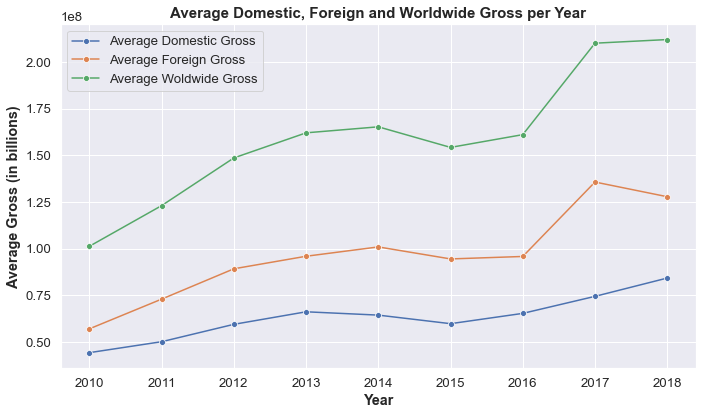

In [197]:
# Plot average domestic_gross, foreign_gross and worldwide_gross per year
plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='domestic_gross', data=average_domestic_gross_per_year, marker='o', label='Average Domestic Gross')
sns.lineplot(x='year', y='foreign_gross', data=average_foreign_gross_per_year, marker='o', label='Average Foreign Gross')
sns.lineplot(x='year', y='worldwide_gross', data=average_worldwide_gross_per_year, marker='o', label='Average Woldwide Gross')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Gross (in billions)', fontweight='bold')
plt.title('Average Domestic, Foreign and Worldwide Gross per Year', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()

plt.show()

## Annual Trend Analysis: Worldwide Gross, Production Budget & Gross Profit

We note a slight year on year increase in average production budget from 2010 - 2013 and 2015 - 2017. The drop in average production budget between 2013 and 2014 may possibly be attributed to a decrease in production of blockbuster movies (i.e., high earning movies with large budgets and a well known cast) or challenging economic times resulting in production studios having to downsize budgets in order to maximize earnings with the peak in 2017 likely largely due to an increase in blockbuster productions.

Average gross profit earnings follows a similar trend to worldwide gross earnings with the average gross profit steadily increasing between 2010 and 2014, dipping in 2015, increasing in 2016, then rising steeply in 2017 as foreing gross earnings reached an all time high. This was followed by a steady rise in gross profit in 2018.

In [69]:
# Calculate the average gross_profit per year
average_gross_profit_per_year = earnings_df_filtered.groupby('year')['gross_profit'].mean().reset_index()
print(average_gross_profit_per_year)

   year  gross_profit
0  2010   63036758.14
1  2011   78514495.12
2  2012  101940258.69
3  2013  109849305.77
4  2014  118879066.13
5  2015  108552177.43
6  2016  112991217.12
7  2017  151022758.27
8  2018  157984234.33


In [70]:
# Calculate the average production_budget per year
average_production_budget_per_year = earnings_df_filtered.groupby('year')['production_budget'].mean().reset_index()
print(average_production_budget_per_year)

   year  production_budget
0  2010        38193964.92
1  2011        44501073.62
2  2012        46617937.06
3  2013        52141726.62
4  2014        46330217.25
5  2015        45631724.14
6  2016        48029787.23
7  2017        58991000.00
8  2018        53974736.84


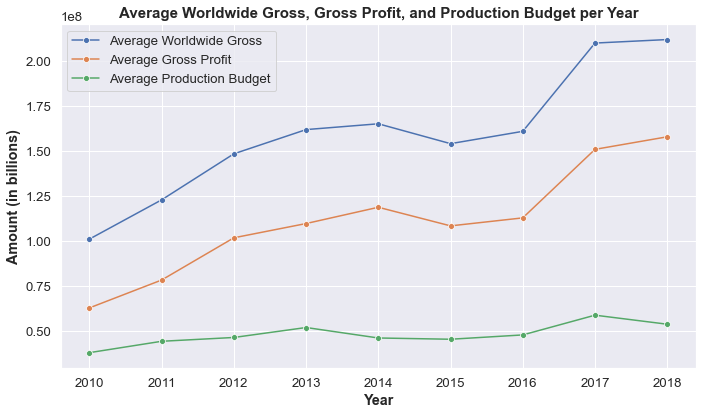

In [198]:
# Plot average worldwide_gross per year
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))

# Plot average woldwide_gross, average gross_profit and production_budget per year
sns.lineplot(x='year', y='worldwide_gross', data=average_worldwide_gross_per_year, marker='o', label='Average Worldwide Gross')
sns.lineplot(x='year', y='gross_profit', data=average_gross_profit_per_year, marker='o', label='Average Gross Profit')
sns.lineplot(x='year', y='production_budget', data=average_production_budget_per_year, marker='o', label='Average Production Budget')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Amount (in billions)', fontweight='bold')
plt.title('Average Worldwide Gross, Gross Profit, and Production Budget per Year', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()

plt.show()

## Trend Analysis: Releases Over the Seasons

From 2010 to 2017 the bulk of movie releases has been in fall. With exception of the years 2014 to 2014, the number of releases in the fall has been steadily declining throughout the years and in 2018 fell below winter and summer releases. 

From 2012, Spring which had been the second most preferred season for movie releases oscilated with Winter and Summer up until 2016 when Spring drop signiicantly to become the season with the least number of movie releases. In 2017 Winter rose above Summer and become the season with the highest number of releases in 2018.

The data therefore implies that there isn't much correlation between the season for release and the success of a movie.

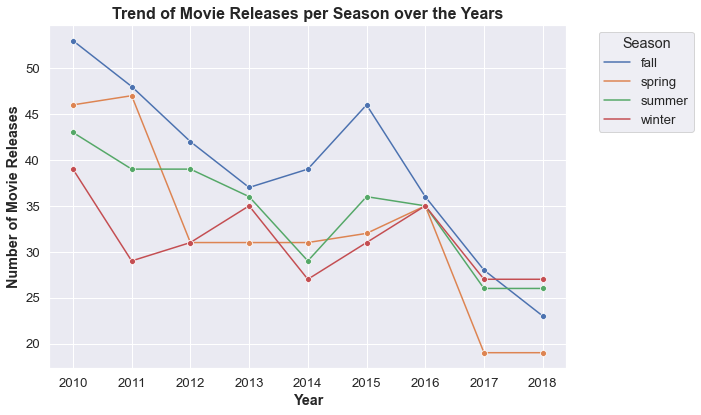

In [199]:
# Group the data by 'season' and 'year', and count the number of movie releases for each combination
movie_releases_per_season = earnings_df_filtered.groupby(['season', 'year']).size().reset_index(name='count')

# Create the line plot 
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', hue='season', data=movie_releases_per_season, marker='o')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Movie Releases', fontweight='bold')
plt.title('Trend of Movie Releases per Season over the Years', fontsize=16, fontweight='bold')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Correlation between Season for Release & Earnings

The correlation coefficient between season for release and domestic gross earnings indicates a very weak negative linear relationship between the two. This implies a propensity for movies release in different seasons to have moderately different domestic gross earnings but the relationship is pretty insignificant.

The correlation between season for release and foreign and worldwide gross earnings is even weaker (close to zero) indicating that there is almost no linear relationship between the season in which a movie is released and its foreign gross earnings thus it does not have any sigificant impact.

In [73]:
# Encode the 'season' column to numeric values using Label Encoding
season_mapping = {'winter': 1, 'spring': 2, 'summer': 3, 'fall': 4}
earnings_df_filtered['season_encoded'] = earnings_df_filtered['season'].map(season_mapping)

Correlation between season and domestic_gross: -0.02616737318375764


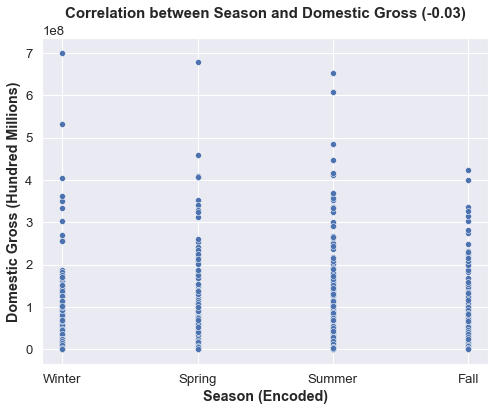

In [200]:
# Calculate the correlation between 'season_encoded' and 'domestic_gross'
dom_correlation = earnings_df_filtered['season_encoded'].corr(earnings_df_filtered['domestic_gross'])

print("Correlation between season and domestic_gross:", dom_correlation)

# Plot the correlation between domestic gross and season for release
plt.figure(figsize=(8, 6))
sns.scatterplot(x='season_encoded', y='domestic_gross', data=earnings_df_filtered)
plt.xlabel('Season (Encoded)', fontweight='bold')
plt.ylabel('Domestic Gross (Hundred Millions)', fontweight='bold')
plt.title('Correlation between Season and Domestic Gross (-0.03)', fontsize=15, fontweight='bold', pad=20)
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(True)

plt.show()

Correlation between season and foreign_gross: -0.0051531879617063


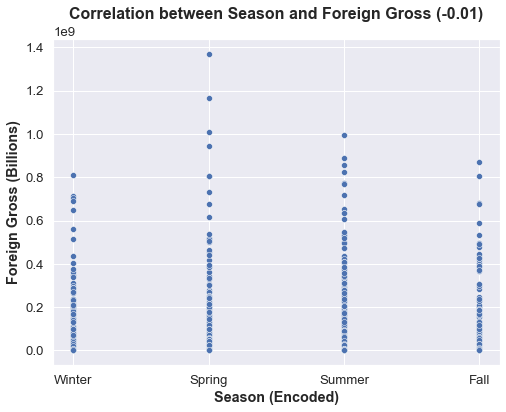

In [204]:
# Calculate the correlation between 'season_encoded' and 'foreign_gross'
for_correlation = earnings_df_filtered['season_encoded'].corr(earnings_df_filtered['foreign_gross'])

print("Correlation between season and foreign_gross:", for_correlation)

# Plot the correlation between foreign gross and season for release
plt.figure(figsize=(8, 6))
sns.scatterplot(x='season_encoded', y='foreign_gross', data=earnings_df_filtered)
plt.xlabel('Season (Encoded)', fontweight='bold')
plt.ylabel('Foreign Gross (Billions)', fontweight='bold')
plt.title('Correlation between Season and Foreign Gross (-0.01)', fontsize=16, fontweight='bold', pad=20)
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(True)

plt.show()

Correlation between season and worldwide_gross: -0.0051531879617063


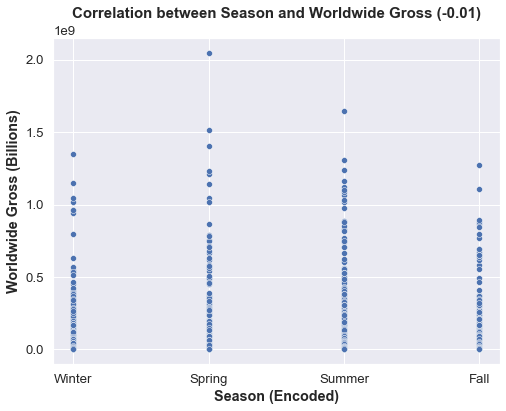

In [203]:
# Calculate the correlation between 'season_encoded' and 'foreign_gross'
for_correlation = earnings_df_filtered['season_encoded'].corr(earnings_df_filtered['foreign_gross'])

print("Correlation between season and worldwide_gross:", for_correlation)

# Plot the correlation between foreign gross and season for release
plt.figure(figsize=(8, 6))
sns.scatterplot(x='season_encoded', y='worldwide_gross', data=earnings_df_filtered)
plt.xlabel('Season (Encoded)', fontweight='bold')
plt.ylabel('Worldwide Gross (Billions)', fontweight='bold')
plt.title('Correlation between Season and Worldwide Gross (-0.01)', fontsize=15, fontweight='bold', pad=20)
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(True)

plt.show()

## Movies Releases: Highest Earners Titles Per Year

Toy Story 3 is the only movie that is the highest earning both domestically and overseas in its release year.

We also note that majority of the highest earning movies worldwide are from the highest earning foreign sales category, with the exception of 'Transformers: Dark of the Moon' and 'Jurassic World'. We therefore deduce that for a movie to be among the top earners its success in the overseas market is crucial.

In [77]:
# # Display the highest domestic earning movies per year

# Find the index of the row with the highest domestic gross earnings for each year
max_domestic_gross_movies_indices = earnings_df_filtered.groupby('year')['domestic_gross'].idxmax()
# Select the rows corresponding to the highest earning movies for each year
highest_domestic_gross_movies = earnings_df_filtered.loc[max_domestic_gross_movies_indices]

highest_domestic_gross_movies[['year', 'title', 'domestic_gross']].sort_values(by='domestic_gross', ascending=False)

year                            title  domestic_gross
1141  2018                    Black Panther       700059566
756   2015                   Jurassic World       652270625
900   2016     Rogue One: A Star Wars Story       532177324
350   2012            The Dark Knight Rises       448139099
496   2013  The Hunger Games: Catching Fire       424668047
0     2010                      Toy Story 3       415004880
1044  2017                     Wonder Woman       412563408
183   2011   Transformers: Dark of the Moon       352390543
642   2014                  American Sniper       350126372

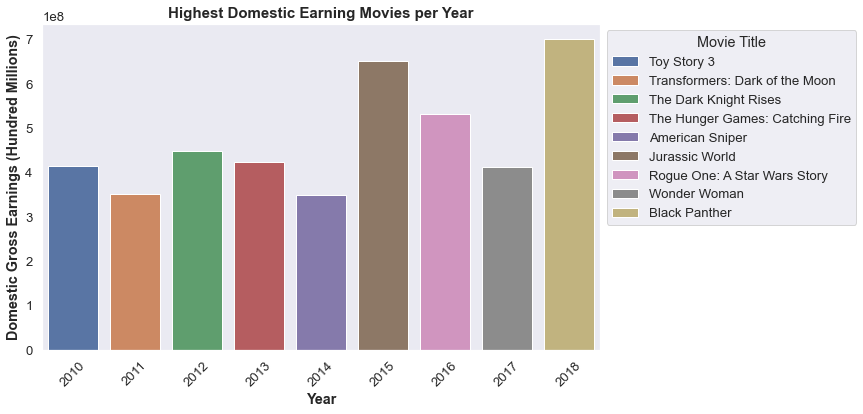

In [205]:
# Plot the highest domestic earning movies per year
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_domestic_gross_movies, x='year', y='domestic_gross', hue='title', dodge=False)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Domestic Gross Earnings (Hundred Millions)', fontweight='bold')
plt.title('Highest Domestic Earning Movies per Year', fontsize=15, fontweight='bold')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Movie Title', bbox_to_anchor=(1, 1))

plt.show()

In [79]:
# Display the highest foreign earning movies per year

# Find the index of the row with the highest foreign gross earnings for each year
max_foreign_gross_movies_indices = earnings_df_filtered.groupby('year')['foreign_gross'].idxmax()
# Select the rows corresponding to the highest earning movies for each year
highest_foreign_gross_movies = earnings_df_filtered.loc[max_foreign_gross_movies_indices]

highest_foreign_gross_movies[['year', 'title', 'foreign_gross', 'studio']].sort_values(by='foreign_gross', ascending=False)


year                                        title  foreign_gross studio
1140  2018                       Avengers: Infinity War     1369318718     BV
757   2015                                    Furious 7     1165715774   Uni.
1039  2017                      The Fate of the Furious     1009081502   Uni.
492   2013                                       Frozen      871731901     BV
630   2014              Transformers: Age of Extinction      858600000   Par.
349   2012                                      Skyfall      806166704   Sony
184   2011  Pirates of the Caribbean: On Stranger Tides      804600000     BV
899   2016                   Captain America: Civil War      731985064     BV
0     2010                                  Toy Story 3      653874642     BV

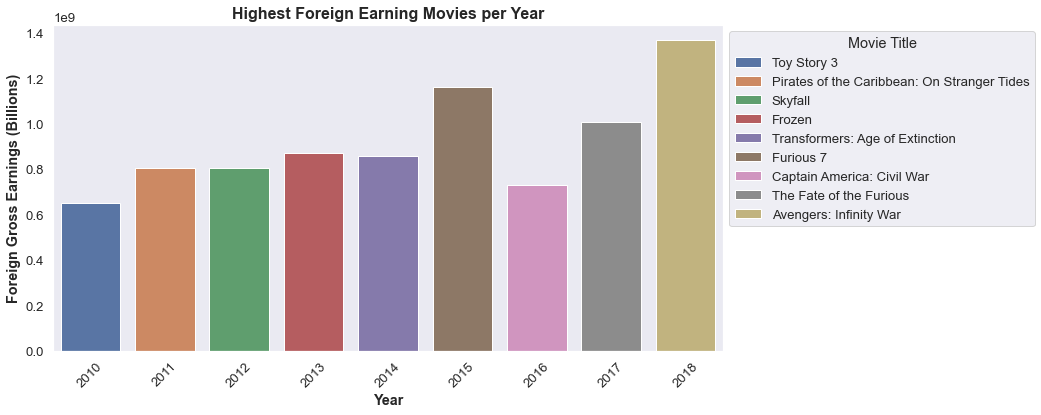

In [80]:
# Plot the highest foreign earning movies per year
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_foreign_gross_movies, x='year', y='foreign_gross', hue='title', dodge=False)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Foreign Gross Earnings (Billions)', fontweight='bold')
plt.title('Highest Foreign Earning Movies per Year', fontsize=15, fontweight='bold')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Movie Title', bbox_to_anchor=(1, 1))

plt.show()

In [81]:
# Display the highest worldwide earning movies per year

# Find the index of the row with the highest gross profit earnings for each year
max_worldwide_gross_movies_indices = earnings_df_filtered.groupby('year')['worldwide_gross'].idxmax()
# Select the rows corresponding to the highest earning movies for each year
highest_worldwide_gross_movies = earnings_df_filtered.loc[max_worldwide_gross_movies_indices]

highest_worldwide_gross_movies[['year', 'title', 'worldwide_gross', 'studio']].sort_values(ascending=False, by='worldwide_gross')

year                            title  worldwide_gross studio
1140  2018           Avengers: Infinity War       2048134200     BV
756   2015                   Jurassic World       1648854864   Uni.
492   2013                           Frozen       1272469910     BV
1039  2017          The Fate of the Furious       1234846267   Uni.
899   2016       Captain America: Civil War       1140069413     BV
183   2011   Transformers: Dark of the Moon       1123790543   P/DW
349   2012                          Skyfall       1110526981   Sony
630   2014  Transformers: Age of Extinction       1104039076   Par.
0     2010                      Toy Story 3       1068879522     BV

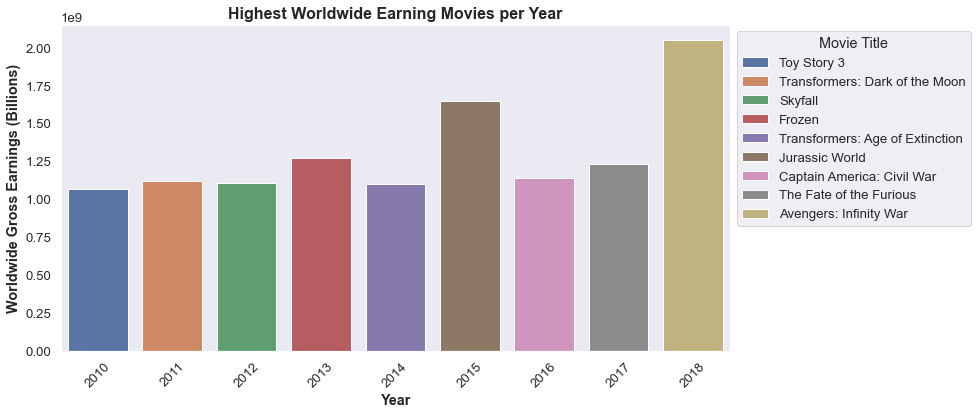

In [82]:
# Plot the highest worldwide earning movies per year
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_worldwide_gross_movies, x='year', y='worldwide_gross', hue='title', dodge=False)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Worldwide Gross Earnings (Billions)', fontweight='bold')
plt.title('Highest Worldwide Earning Movies per Year', fontsize=15, fontweight='bold')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Movie Title', bbox_to_anchor=(1, 1))

plt.show()

## Movie Releases: Most Profitable Titles Per Year

The highest earning movies worldwide each year are also appear to be the most profitable movies in their respective years.

In [83]:
# Display movies with the highest gross profit per year

# Find the index of the row with the highest domestic gross earnings for each year
max_grossprofit_movies_indices = earnings_df_filtered.groupby('year')['gross_profit'].idxmax()

# Select the rows corresponding to the highest earning movies for each year
highest_grossprofit_movies = earnings_df_filtered.loc[max_grossprofit_movies_indices]

highest_grossprofit_movies[['year', 'title', 'gross_profit', 'studio']].sort_values(ascending=False, by='gross_profit')

year                            title  gross_profit studio
1140  2018           Avengers: Infinity War    1748134200     BV
756   2015                   Jurassic World    1433854864   Uni.
492   2013                           Frozen    1122469910     BV
1039  2017          The Fate of the Furious     984846267   Uni.
183   2011   Transformers: Dark of the Moon     928790543   P/DW
349   2012                          Skyfall     910526981   Sony
630   2014  Transformers: Age of Extinction     894039076   Par.
899   2016       Captain America: Civil War     890069413     BV
0     2010                      Toy Story 3     868879522     BV

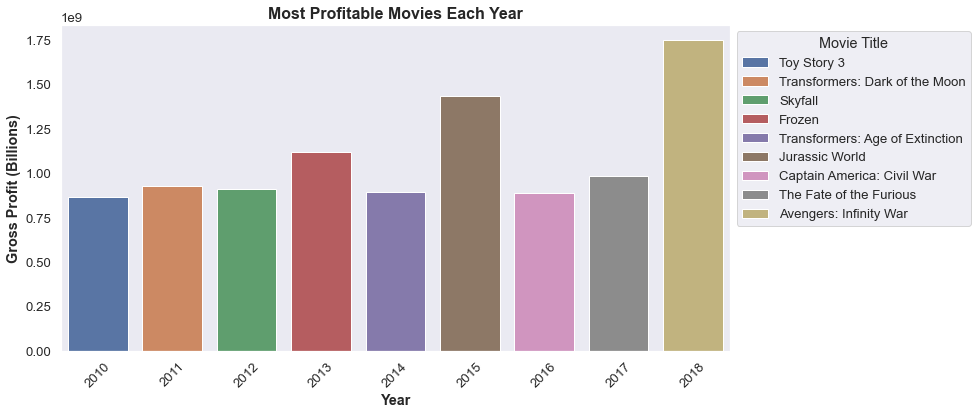

In [84]:
# Plot the movies with the highest gross profit per year
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_grossprofit_movies, x='year', y='gross_profit', hue='title', dodge=False)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Gross Profit (Billions)', fontweight='bold')
plt.title('Most Profitable Movies Each Year', fontsize=15, fontweight='bold')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title='Movie Title', bbox_to_anchor=(1, 1))

plt.show()

## Studios: Top 20 Releases Over the Years

We look at the number of movie releases per studio for each year and find that Universal Studios, Warner Brothers and Fox are consistently been among the highest number of movies producers over the 8 year period.

In [85]:
# Display number of movies per studio each year
movies_per_studio_per_year = earnings_df_filtered.groupby(['studio', 'year']).size()\
                .reset_index(name='count').sort_values(by='count', ascending=False)
movies_per_studio_per_year

studio  year  count
256   Uni.  2015     20
267     WB  2010     15
80     Fox  2013     14
272     WB  2015     14
82     Fox  2015     14
..     ...   ...    ...
137    MGM  2010      1
138    MGM  2018      1
145  Magn.  2015      1
147  Mont.  2010      1
296   Yash  2016      1

[297 rows x 3 columns]

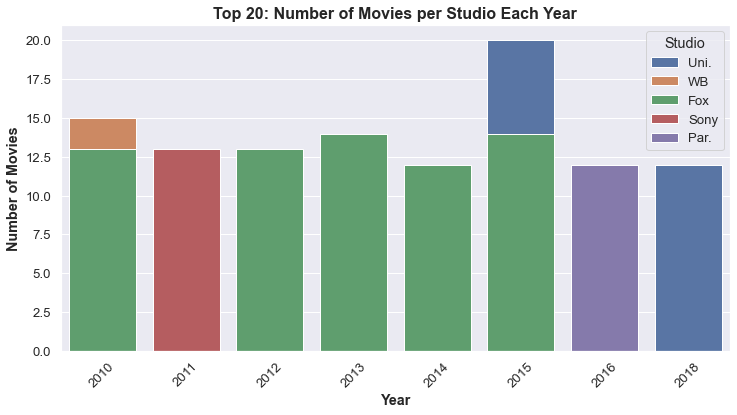

In [86]:
# Plot the top 20 number of movies per studio each year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='count', hue='studio', data=movies_per_studio_per_year.head(20), dodge=False)
plt.title('Top 20: Number of Movies per Studio Each Year', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Movies', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Studio', loc='upper right')

plt.show()

## Studios: Highest Earning Per Year

Looking at the highest earners year on year, domstically Walt Disney (BV) and Warner Bros. (WB) appear to have been the most successful with their releases making them the highest earners in 3 out of the 9 years. 

Overseas Walt Disney have had even more success with their productions as they have been the highest earning studio for 5 out of the 9 years. Also successful with their production in the foreign market is Universal being the highest earner in 2 different years.

Looking at global earnings in totality, the data infers that Walt Disney is the most successful production studio between 2010 and 2018 having been the highest earner in 3 different years, followed thereon by Universal Studios.

In [87]:
# Find the studio with the highest domestic_gross earnings each year
# Group by 'year' and find the index of the maximum domestic gross earnings for each year
max_dom_studio_indices = earnings_df_filtered.groupby('year')['domestic_gross'].idxmax()

# Select the studios with the highest domestic gross earnings for each year
studio_dom_earnings_per_year = earnings_df_filtered.loc[max_dom_studio_indices, ['year', 'studio', 'domestic_gross']]\
                                .sort_values(by='domestic_gross', ascending=False)

studio_dom_earnings_per_year

year studio  domestic_gross
1141  2018     BV       700059566
756   2015   Uni.       652270625
900   2016     BV       532177324
350   2012     WB       448139099
496   2013    LGF       424668047
0     2010     BV       415004880
1044  2017     WB       412563408
183   2011   P/DW       352390543
642   2014     WB       350126372

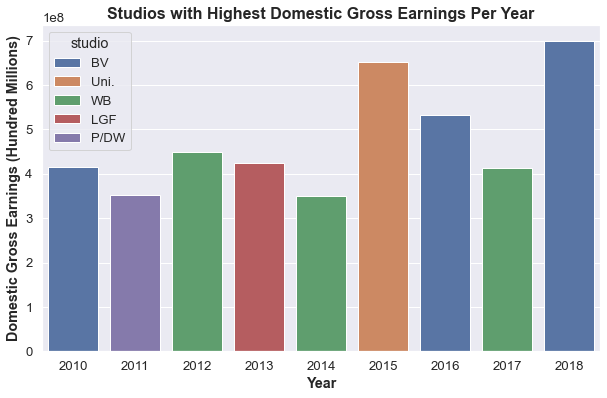

In [88]:
# Plot the studios with the highest domestic gross earnings for each year
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='domestic_gross', hue='studio', data=studio_dom_earnings_per_year, dodge=False)
plt.title("Studios with Highest Domestic Gross Earnings Per Year", fontsize=15, fontweight='bold')
plt.ylabel("Domestic Gross Earnings (Hundred Millions)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')

plt.show()

In [89]:
# Find the studio with the highest foreign_gross earnings each year
# Group by 'year' and find the index of the maximum foreign gross earnings for each year
max_for_studio_indices = earnings_df_filtered.groupby('year')['foreign_gross'].idxmax()

# Select the studios with the highest foreign gross earnings for each year
studio_for_earnings_per_year = earnings_df_filtered.loc[max_for_studio_indices, ['year', 'studio', 'foreign_gross']]\
                                .sort_values(by='foreign_gross', ascending=False)

studio_for_earnings_per_year

year studio  foreign_gross
1140  2018     BV     1369318718
757   2015   Uni.     1165715774
1039  2017   Uni.     1009081502
492   2013     BV      871731901
630   2014   Par.      858600000
349   2012   Sony      806166704
184   2011     BV      804600000
899   2016     BV      731985064
0     2010     BV      653874642

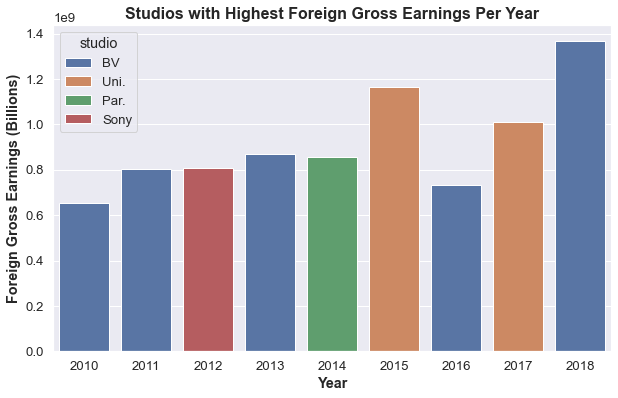

In [90]:
# Plot the studios with the highest foreign gross earnings for each year
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='foreign_gross', hue='studio', data=studio_for_earnings_per_year, dodge=False)
plt.title("Studios with Highest Foreign Gross Earnings Per Year", fontsize=15, fontweight='bold')
plt.ylabel("Foreign Gross Earnings (Billions)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')

plt.show()

In [91]:
# Find the studio with the highest worldwide_gross earnings each year
# Group by 'year' and find the index of the maximum worldwide gross earnings for each year
max_ww_studio_indices = earnings_df_filtered.groupby('year')['worldwide_gross'].idxmax()

# Select the studios with the highest worldwide gross earnings for each year
studio_ww_earnings_per_year = earnings_df_filtered.loc[max_ww_studio_indices, ['year', 'studio', 'worldwide_gross']]\
                                .sort_values(by='worldwide_gross', ascending=False)

studio_ww_earnings_per_year

year studio  worldwide_gross
1140  2018     BV       2048134200
756   2015   Uni.       1648854864
492   2013     BV       1272469910
1039  2017   Uni.       1234846267
899   2016     BV       1140069413
183   2011   P/DW       1123790543
349   2012   Sony       1110526981
630   2014   Par.       1104039076
0     2010     BV       1068879522

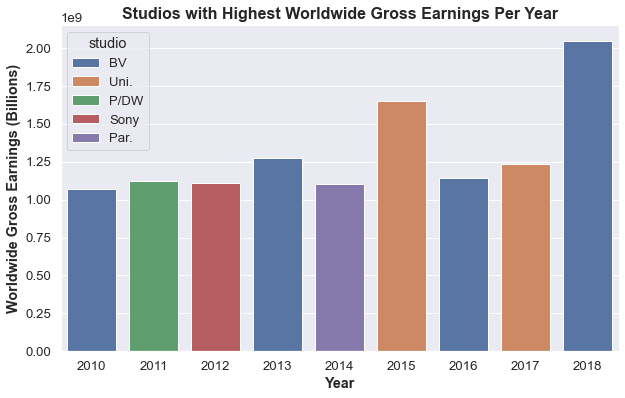

In [92]:
# Plot the studios with the highest worldwide gross earnings for each year
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='worldwide_gross', hue='studio', data=studio_ww_earnings_per_year, dodge=False)
plt.title("Studios with Highest Worldwide Gross Earnings Per Year", fontsize=15, fontweight='bold')
plt.ylabel("Worldwide Gross Earnings (Billions)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')

plt.show()

## Correlation Between the Number of Releases and Earnings

There is a strong positive linear relationship between total number of movie releases and earning i.e., as the number of movies release so does earnings as the studio has an increased opportunity to generate money either throgh ticket sales, streaming or any other means. We also consider the fact that other factors such as marketing, script, cast and even audience preference could all be contributing factors to a movie earning more.

In [93]:
# Group by studio and calculate total releases
total_releases_per_studio = earnings_df_filtered.groupby('studio')['title'].count().reset_index()
total_releases_per_studio.columns = ['studio', 'total_releases']

# Group by studio and calculate total earnings
total_earnings_per_studio = earnings_df_filtered.groupby('studio')[['worldwide_gross']].sum().reset_index()
total_earnings_per_studio['total_earnings'] = total_earnings_per_studio['worldwide_gross']

# Merge the two DataFrames on 'studio'
studio_correlation_df = pd.merge(total_releases_per_studio, total_earnings_per_studio, on='studio')

# Calculate the correlation between total releases and total earnings
correlation = studio_correlation_df['total_releases'].corr(studio_correlation_df['total_earnings'])

print("Correlation between total releases and total earnings per studio:", correlation)

Correlation between total releases and total earnings per studio: 0.8947428430780896


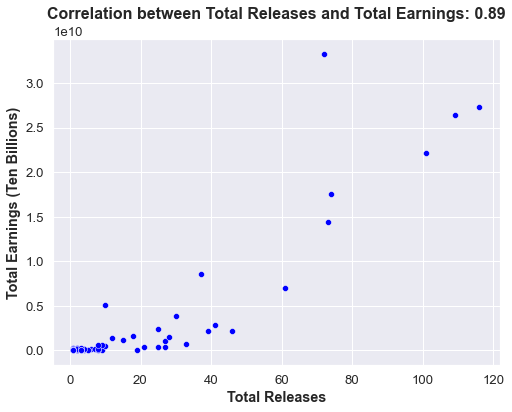

In [94]:
# Plot the correlation between total releases and total earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=studio_correlation_df, x='total_releases', y='total_earnings', color='blue')
plt.xlabel('Total Releases', fontweight='bold')
plt.ylabel('Total Earnings (Ten Billions)', fontweight='bold')
plt.title(f'Correlation between Total Releases and Total Earnings: {correlation:.2f}', fontsize=15, fontweight='bold', pad=20)
plt.grid(True)

plt.show()

## Studios: Distribution of Earnings

The order of the top 10 studios in worldwide earnings follows that of the highest earning studios domestically. Walt Disney (BV) is consistently the highest earner in all markets. Domestically, Universal Studios is the second highest earning studio but sits third in the foreign market. The inverse is truefor Fox who sit second in earnings overseas but third domestically.

All studios in the top 10 earned above USD 1 billion

In [95]:
# Find the highest domestic earning studios
studio_dom_earnings = earnings_df_filtered.groupby('studio')['domestic_gross'].sum().reset_index()\
        .sort_values(by='domestic_gross', ascending=False)

studio_dom_earnings

studio  domestic_gross
15     BV  12926142171.00
89   Uni.  10691338728.00
31    Fox   9255537871.00
93     WB   9130501469.00
81   Sony   6969180777.00
..    ...             ...
27    FCW        17484.00
5     Alc        17472.00
64     P4         9120.00
10    BBC            0.00
43     KE            0.00

[98 rows x 2 columns]

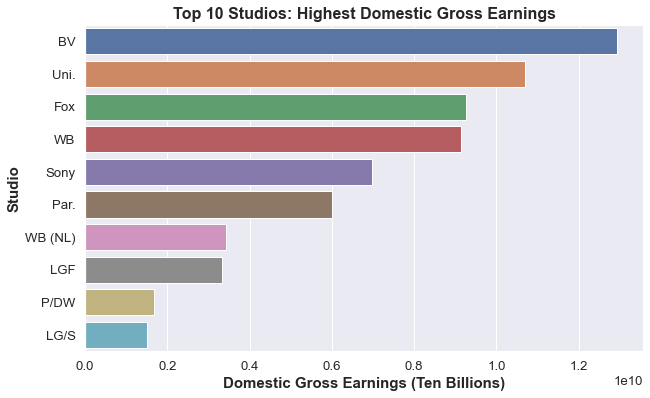

In [96]:
# Plot the top 10 studios with the highest domestic earnings
plt.figure(figsize=(10, 6))
sns.barplot(x='domestic_gross', y='studio', data=studio_dom_earnings.head(10))
plt.title('Top 10 Studios: Highest Domestic Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Domestic Gross Earnings (Ten Billions)', fontsize=15, fontweight='bold')
plt.ylabel('Studio', fontsize=15, fontweight='bold')

plt.show()

In [97]:
# Find the highest foreign earning studios
studio_foreign_earnings= earnings_df_filtered.groupby('studio')['foreign_gross'].sum().reset_index()\
                            .sort_values(by='foreign_gross', ascending=False)

studio_foreign_earnings

studio  foreign_gross
15     BV 20359875766.00
31    Fox 17207142707.00
89   Uni. 16614443235.00
93     WB 13059955452.00
81   Sony 10545401315.00
..    ...            ...
43     KE       94953.00
29  First       15461.00
10    BBC        7943.00
95    WHE           0.00
40    IVP           0.00

[98 rows x 2 columns]

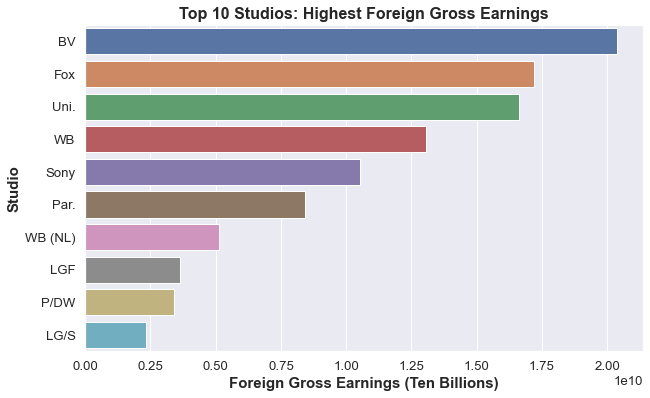

In [98]:
# Plot the top 10 studios with the highest foreign earnings
plt.figure(figsize=(10, 6))
sns.barplot(x='foreign_gross', y='studio', data=studio_foreign_earnings.head(10))
plt.title('Top 10 Studios: Highest Foreign Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Foreign Gross Earnings (Ten Billions)', fontsize=15, fontweight='bold')
plt.ylabel('Studio', fontsize=15, fontweight='bold')

plt.show()

In [99]:
# Find the highest worldwide earning studios
studio_ww_earnings= earnings_df_filtered.groupby('studio')['worldwide_gross'].sum().reset_index()\
                            .sort_values(by='worldwide_gross', ascending=False)

studio_ww_earnings.head(10)

studio  worldwide_gross
15       BV   33286017937.00
89     Uni.   27305781963.00
31      Fox   26462680578.00
93       WB   22190456921.00
81     Sony   17514582092.00
68     Par.   14438105394.00
94  WB (NL)    8540864247.00
47      LGF    6983389000.00
63     P/DW    5078027601.00
46     LG/S    3815924856.00

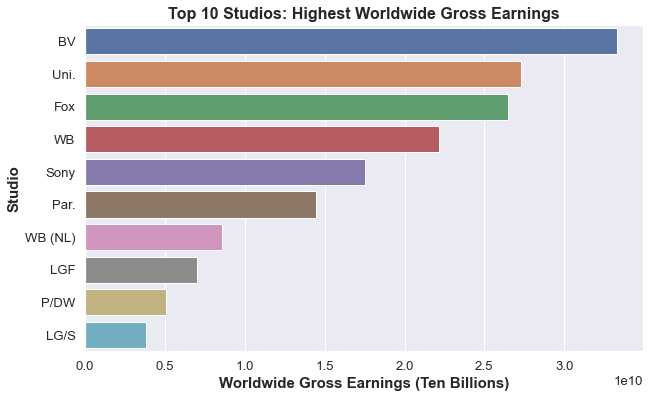

In [100]:
# Plot the top 10 studios with the highest worldwide earnings
plt.figure(figsize=(10, 6))
sns.barplot(x='worldwide_gross', y='studio', data=studio_ww_earnings.head(10))
plt.title('Top 10 Studios: Highest Worldwide Gross Earnings', fontsize=15, fontweight='bold')
plt.xlabel('Worldwide Gross Earnings (Ten Billions)', fontsize=15, fontweight='bold')
plt.ylabel('Studio', fontsize=15, fontweight='bold')

plt.show()

## Studios: Top 10 Most Profitable

The highest grossing studios worldwide are also the most profitable in the same ranking.

In [101]:
#Find the top 20 studios with the highest gross_profit
total_profit_per_studio = earnings_df_filtered.groupby('studio')['gross_profit'].sum()
top20_studios_profit = total_profit_per_studio.nlargest(10).reset_index()

top20_studios_profit

studio   gross_profit
0       BV 23835217937.00
1     Uni. 20733081963.00
2      Fox 18794680578.00
3       WB 13996456921.00
4     Sony 12464082092.00
5     Par.  9671105394.00
6  WB (NL)  6392264247.00
7      LGF  4914001350.00
8     P/DW  3744027601.00
9     LG/S  2158424856.00

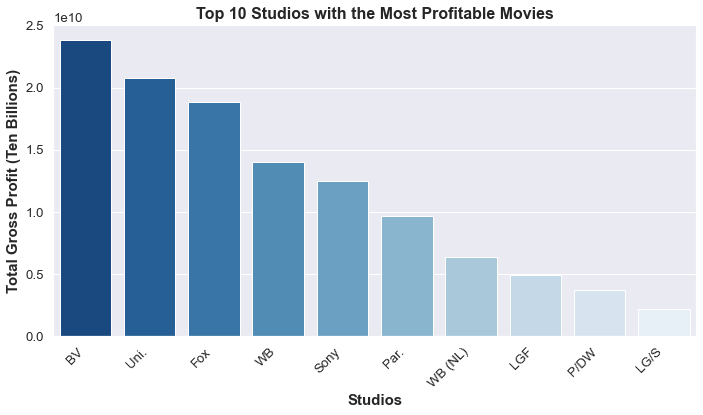

In [102]:
# Plot the top 10 profitable studios
plt.figure(figsize=(10, 6))
sns.barplot(x='studio', y='gross_profit', data=top20_studios_profit, palette='Blues_r')
plt.xlabel('Studios', fontsize=15, fontweight='bold')
plt.ylabel('Total Gross Profit (Ten Billions)', fontsize=15, fontweight='bold')
plt.title('Top 10 Studios with the Most Profitable Movies', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Studios: Top 20 Highest Earning Titles

The top 20 highest earning movies from 2010 to 2018, domestically and oveseas are produced by 10 studios

Looking specifically at the highest domestic grossing movies, we see that Walt Disney appears to dominate the market with 50% of the highest earners being produced by them. We also observe that sequels make up 70% of the top earners.

In the overseas market, Walt Disney and Universal Studios have the highest success in terms of earning with their productios making up 60% of the highest earners (30% each). Warner Bros. Netherlands also appears as a top earner with their productions of 'The Hobbit' making up 15%. Sequels also make up 70% of the top earners.


Taking a look at gross earnings worldwide, Walt Disney and Universal studios are the most successful with only their movies appearing in the top 11. Walt Disney's productions overall make up 50% of the highest earners gloabally while Universal's make up 25%. Sony, Paramount Dreamworks, Warner Bros and Paramount pictures also have successful productions making up the top 20 highest global earners. 75% of the top global earners are sequels.

The data infers that between 2010 and 2018 sequels generally fetch more at the box office than stand alone original films or oiginal films related to a sequel (parent films) although we take cognisance of the fact that the data may be missing information regarding the sequel's parent films. We may therefore attribute the findings below to a dominance in number of sequel releases during the period.

We also note that about 75% of the top worldwide earning movies during the period are novel or comic book adaptations.

In [206]:
# Find the top 20 highest domestic earning movies per studio
top20_dom_earners = earnings_df_filtered.nlargest(20, "domestic_gross")\
        [["title", "domestic_gross", "studio"]]
top20_dom_earners.head()

title  domestic_gross studio
1141                 Black Panther       700059566     BV
1140        Avengers: Infinity War       678815482     BV
756                 Jurassic World       652270625   Uni.
1143                 Incredibles 2       608581744     BV
900   Rogue One: A Star Wars Story       532177324     BV

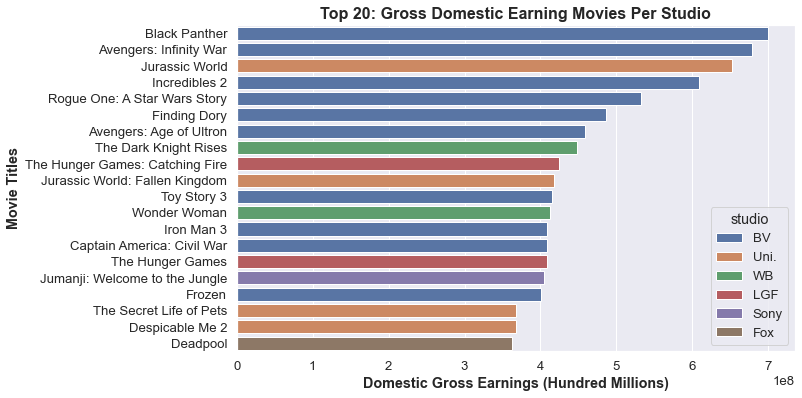

In [104]:
# Plot the top 20 highest domestic earning movies per studio
plt.figure(figsize=(10, 6))
sns.barplot(x="domestic_gross", y="title", orient="h", data=top20_dom_earners, hue="studio",
           dodge=False)
plt.title("Top 20: Gross Domestic Earning Movies Per Studio", fontsize=15, fontweight='bold')
plt.xlabel("Domestic Gross Earnings (Hundred Millions)", fontweight='bold')
plt.ylabel("Movie Titles", fontweight='bold')

plt.show()

In [105]:
# Find the top 20 highest foreign earning movies per studio
top20_foreign_earners = earnings_df_filtered.nlargest(20, "foreign_gross")\
        [["title", "foreign_gross", "studio"]]
top20_foreign_earners.head()

title  foreign_gross studio
1140   Avengers: Infinity War     1369318718     BV
757                 Furious 7     1165715774   Uni.
1039  The Fate of the Furious     1009081502   Uni.
756            Jurassic World      996584239   Uni.
758   Avengers: Age of Ultron      944008095     BV

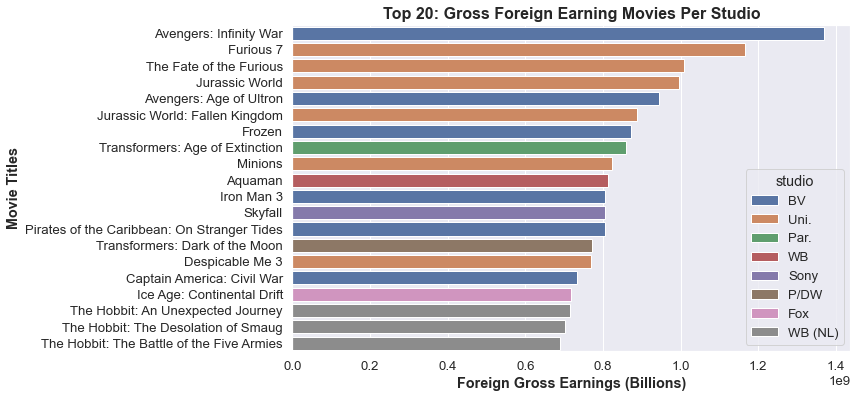

In [106]:
# Plot the to 10 highest foreign earning movies per studio
plt.figure(figsize=(10, 6))
sns.barplot(x='foreign_gross', y='title', orient='h', data=top20_foreign_earners, hue='studio',
           dodge=False)
plt.title('Top 20: Gross Foreign Earning Movies Per Studio', fontsize=15, fontweight='bold')
plt.xlabel('Foreign Gross Earnings (Billions)', fontweight='bold')
plt.ylabel('Movie Titles', fontweight='bold')

plt.show()

In [107]:
# Find the top 10 highest earning movies worldwide per studio
top20_worldwide_earners = earnings_df_filtered.nlargest(20, "worldwide_gross")\
        [["title", "worldwide_gross", "studio"]]
top20_worldwide_earners.head()

title  worldwide_gross studio
1140   Avengers: Infinity War       2048134200     BV
756            Jurassic World       1648854864   Uni.
757                 Furious 7       1518722794   Uni.
758   Avengers: Age of Ultron       1403013963     BV
1141            Black Panther       1348258224     BV

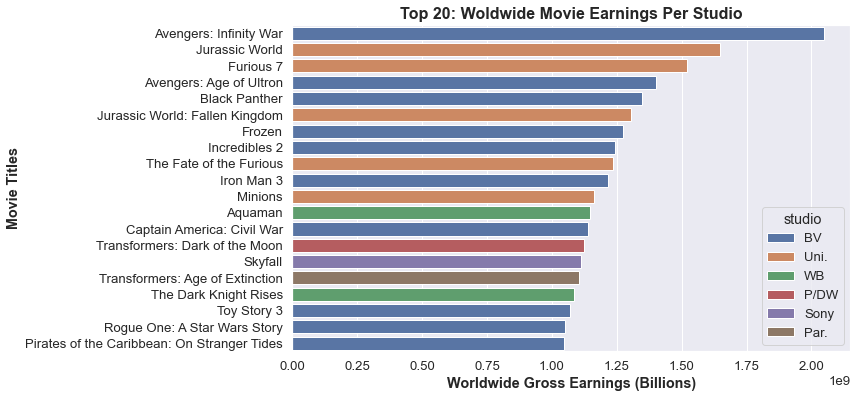

In [108]:
# Plot the top 20 highest earning movies worldwide per studio
plt.figure(figsize=(10, 6))
sns.barplot(x="worldwide_gross", y="title", orient="h", data=top20_worldwide_earners, hue="studio",
           dodge=False)
plt.title("Top 20: Woldwide Movie Earnings Per Studio", fontsize=15, fontweight='bold')
plt.xlabel("Worldwide Gross Earnings (Billions)", fontweight='bold')
plt.ylabel("Movie Titles", fontweight='bold')

plt.show()

## Studios: Top 20 Most Profitable Releases

Only 16 out of the top 20 gross worldwide earning movies are also the most proitable. 65% of the most profitable movies are sequels.

In [109]:
# Display the studios with the top 20 most profitable movie releases
top20_profitable_movies = earnings_df_filtered.nlargest(20, "gross_profit")
top20_profitable_movies[['title', 'gross_profit', 'studio']].head()

title  gross_profit studio
1140          Avengers: Infinity War    1748134200     BV
756                   Jurassic World    1433854864   Uni.
757                        Furious 7    1328722794   Uni.
1141                   Black Panther    1148258224     BV
1142  Jurassic World: Fallen Kingdom    1135772799   Uni.

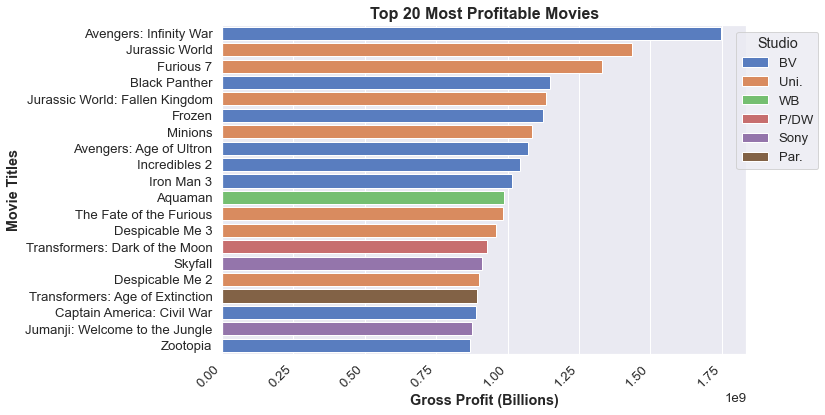

In [110]:
# Plot the top 10 most profitable movies
plt.figure(figsize=(12, 6))
sns.barplot(x='gross_profit', y='title', orient='h', hue='studio', data=top20_profitable_movies, palette='muted', dodge=False)
plt.xlabel('Gross Profit (Billions)', fontweight='bold')
plt.ylabel('Movie Titles', fontweight='bold')
plt.title('Top 20 Most Profitable Movies', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Studio', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()

plt.show()

In [111]:
# Find the number of movies both in top20_worldwide_earners and top20_profitable_movies
common_movies = pd.merge(top20_worldwide_earners, top20_profitable_movies, on='title')
num_common_movies = len(common_movies)

print("Number of movies in both top20_worldwide_earners and top_20_profitable_movies:", num_common_movies)

Number of movies in both top20_worldwide_earners and top_20_profitable_movies: 16


## Production Budget: Average Budget per Studio

On average Paramount Dreamworks (P/DW) allocated the highest budget to towards their projects. While they have not been the top highest earning or most profitable studio they have been in consistently in the top 10.

Walt Disney, the highest and most profitable studio within the period on average allocates the second highest budget towards its projects, followed there on by WB and Fox who have also consistently been among the highest earners and the most profitable.

Newmarket films also appear in the top 5 although they made a loss for their production.

In [112]:
# Average production budget per studio

# Group by 'studio' and calculate the average production budget
avg_prod_budget_per_studio = earnings_df_filtered.groupby('studio')['production_budget'].mean().reset_index()\
                            .sort_values(by='production_budget', ascending=False)

# Rename the column for clarity
avg_prod_budget_per_studio.columns = ['studio', 'average_production_budget']

avg_prod_budget_per_studio

studio  average_production_budget
63   P/DW               133400000.00
15     BV               131261111.11
93     WB                81128712.87
31    Fox                70348623.85
56     NM                70000000.00
..    ...                        ...
40    IVP                 2000000.00
48    LGP                 2000000.00
87  Trib.                 1000000.00
44   Kino                 1000000.00
10    BBC                  600000.00

[98 rows x 2 columns]

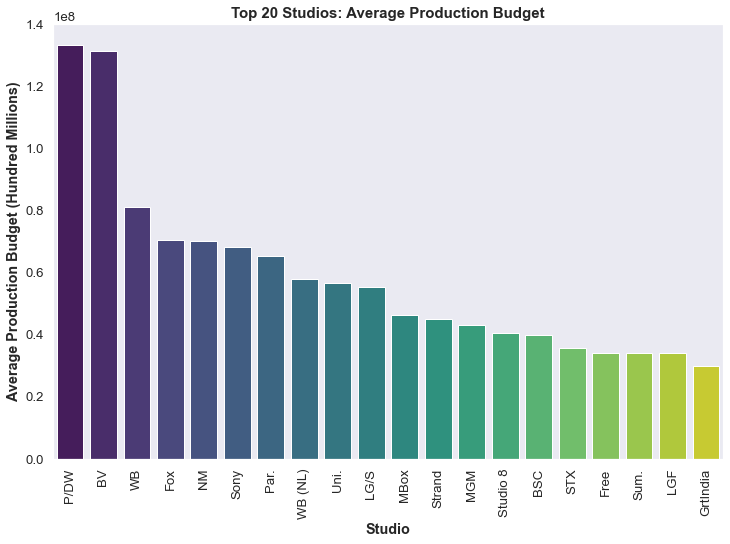

In [207]:
# Plot average production budget per year
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_prod_budget_per_studio.head(20), x='studio', y='average_production_budget', palette='viridis')
plt.xlabel('Studio', fontweight='bold')
plt.ylabel('Average Production Budget (Hundred Millions)', fontweight='bold')
plt.title('Top 20 Studios: Average Production Budget', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

In [114]:
earnings_df_filtered[earnings_df_filtered['studio'] == 'NM']

title studio release_date  production_budget  domestic_gross  \
89  Agora     NM   2010-05-28           70000000          619423   

    worldwide_gross  gross_profit  foreign_gross  season  year  season_encoded  
89         38992292     -31007708       38372869  spring  2010               2

## Production Budget: Top 20 Studios with the Highest Budgets

Walt Disney being the highest earning studio and the most profitable is also the studio with the highest budget. We observe that the top 20 most profitable studios are also the same top 2 studios with the highest budget in the same order.

In [115]:
#Find the studios with the highest production budgets
studio_prod_budgets = earnings_df_filtered.groupby('studio')['production_budget'].sum()
top20_studios_budgets = studio_prod_budgets.nlargest(20).reset_index()

top20_studios_budgets

studio  production_budget
0        BV      9450800000.00
1        WB      8194000000.00
2       Fox      7668000000.00
3      Uni.      6572700000.00
4      Sony      5050500000.00
5      Par.      4767000000.00
6   WB (NL)      2148600000.00
7       LGF      2069387650.00
8      LG/S      1657500000.00
9      P/DW      1334000000.00
10    Wein.       838000000.00
11    Focus       831500000.00
12     SGem       727500000.00
13    Rela.       725500000.00
14      STX       534100000.00
15      ORF       527700000.00
16     FoxS       500380000.00
17     TriS       494800000.00
18     Sum.       409800000.00
19      SPC       310590000.00

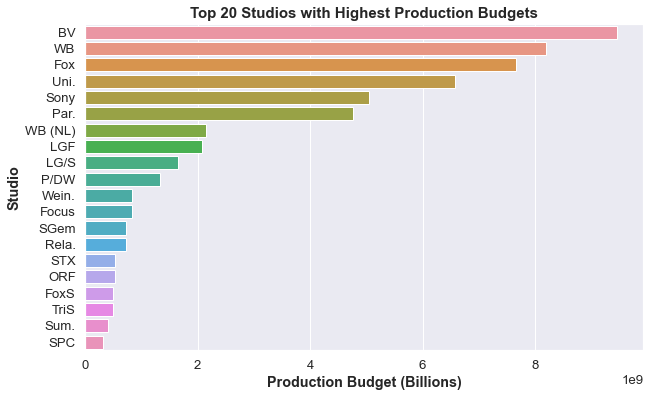

In [208]:
# Plot the top 10 studios with the highest production budgets
plt.figure(figsize=(10, 6))
sns.barplot(x='production_budget', y='studio', data=top20_studios_budgets)
plt.title('Top 20 Studios with Highest Production Budgets', fontsize=15, fontweight='bold')
plt.xlabel('Production Budget (Billions)', fontweight='bold')
plt.ylabel('Studio', fontweight='bold')

plt.show()

In [117]:
# Check find the number of studios in with the highest profit which are also the most profitable 
common_studios = pd.merge(top20_studios_budgets, top20_studios_profit, on='studio')
num_common_studios = len(common_studios)

print("Number of studios in top20_studios_budgets that are also in top20_studios_profit:", num_common_studios)

Number of studios in top20_studios_budgets that are also in top20_studios_profit: 10


## Production Budget: Movies with the Largest Budget

Only 4 of the movies with the highest production budget are among the top 20 most profitable movies out of which 3 are produced by Walt Disney and the other by Universal Studios. 

From the top 20 movies with the largest production budgets, Walt Disney's movies make up 45%, follwed there after by Warner Bros. productions at 20%, Warner Bros. Netherlands at 15% and the other spots occupied by Sony and Universal Studio's movies. 

In [209]:
# Get the top 10 movies with the largest production budgets
movies_largest_budget = earnings_df_filtered.nlargest(20, 'production_budget')\
                        [["title", "production_budget", "studio"]]

movies_largest_budget.head()

title  production_budget studio
184   Pirates of the Caribbean: On Stranger Tides          410600000     BV
758                       Avengers: Age of Ultron          330600000     BV
760                                       Spectre          300000000   Sony
1048                               Justice League          300000000     WB
1140                       Avengers: Infinity War          300000000     BV

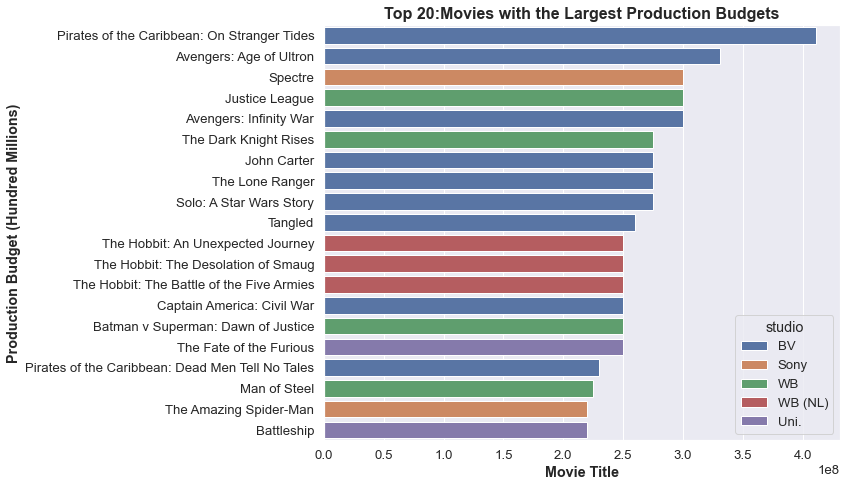

In [119]:
# Plot the top 20 movies with the largest production budgets
plt.figure(figsize=(12, 7))
sns.barplot(data=movies_largest_budget, x='production_budget', y='title', orient='h', hue='studio', dodge=False)
plt.xlabel('Movie Title', fontweight='bold')
plt.ylabel('Production Budget (Hundred Millions)', fontweight='bold')
plt.title('Top 20:Movies with the Largest Production Budgets', fontsize=15, fontweight='bold')
plt.tight_layout()

plt.show()

In [120]:
# Check if movies_largest_budget titles are in top20_profitable_movies
common_movies2 = movies_largest_budget[movies_largest_budget['title'].isin(top20_profitable_movies['title'])]

common_movies2[['title', 'production_budget', 'studio']]

title  production_budget studio
758      Avengers: Age of Ultron          330600000     BV
1140      Avengers: Infinity War          300000000     BV
899   Captain America: Civil War          250000000     BV
1039     The Fate of the Furious          250000000   Uni.

## Gross Profit & Production Budget

The data infers that the average gross profit earned increases with in budget. 

We observe that movies in the low budget category have brought in the lowest aggregate gross profit, followed there on by the medium and high budget categories. The high budget category on average has earnedover 3 times the gross profit that the low budget category has earned. 

The very high budget category far surpasses the rest in earnings as movies within this category on average bring in over USD 22.5 million above the high budget category. Over and above the budget various other factors would result in such blockbuster films earning such ernormous profit which include the storyline, actors, marketing, among others.

In [121]:
# Categorize the movies into budget categories
production_budget_quantiles = earnings_df_filtered['production_budget'].quantile([0.25, 0.5, 0.75])
low_budget = production_budget_quantiles[0.25]
medium_budget = production_budget_quantiles[0.5]
high_budget = production_budget_quantiles[0.75]


# Group the data by budget category
budget_category = pd.cut(earnings_df_filtered['production_budget'],
                         bins=[0, low_budget, medium_budget, high_budget, float('inf')],
                         labels=['Low Budget', 'Medium Budget', 'High Budget', 'Very High Budget'])

# Calculate the average gross profit for each budget category
average_gross_profit_by_budget = earnings_df_filtered.groupby(budget_category)['gross_profit'].mean().reset_index()

average_gross_profit_by_budget

production_budget  gross_profit
0        Low Budget   22390693.02
1     Medium Budget   39412644.12
2       High Budget   76050365.57
3  Very High Budget  301564764.15

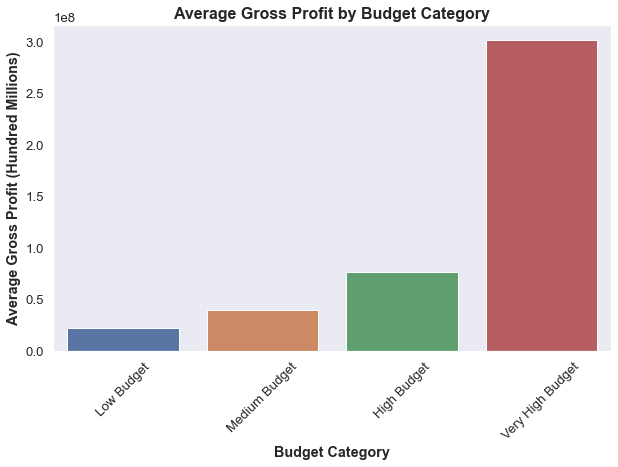

In [122]:
# Plot the average gross profit for each budget category
plt.figure(figsize=(10, 6))
sns.barplot(x='production_budget', y='gross_profit', data=average_gross_profit_by_budget)
plt.xlabel('Budget Category', fontweight='bold')
plt.ylabel('Average Gross Profit (Hundred Millions)', fontweight='bold')
plt.title('Average Gross Profit by Budget Category', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Analyzing Sequels

### Define the Function to Find Similar Movie Titles

In [123]:
# Define the function to find similar movie titles
def find_similar_movies(title, all_titles):
    similar_movies = process.extract(title, all_titles, limit=5)
    return [movie[0] for movie in similar_movies]

In [124]:
title_to_search = 'Pirates of'
all_movie_titles = earnings_df_filtered['title'].unique()

similar_movies = find_similar_movies(title_to_search, all_movie_titles)
print(similar_movies)

['Pirates of the Caribbean: On Stranger Tides', 'Pirates of the Caribbean: Dead Men Tell No Tales', 'The Chronicles of Narnia: The Voyage of the Dawn Treader', 'The Book of Eli', "Legend of the Guardians: The Owls of Ga'Hoole"]


### Comparing the Gross Profit

All sequel releases are very profitable, and are a great way for studios to earn profits by further developing existing produtions. The performance between earlier and later releases varies from movie to movie. The contributors to why this may be difficult to determine from the data available but may be attributable to success of the preceeding movie, script and marketing.

In [125]:
# Create a list of movie titles and dataframes for each movie
movies_data = {
    'Avengers': earnings_df_filtered[earnings_df_filtered['title'].isin(['Avengers: Age of Ultron', 'Avengers: Infinity War'])],
    'Jurassic World': earnings_df_filtered[earnings_df_filtered['title'].isin(['Jurassic World', 'Jurassic World: Fallen Kingdom'])],
    'Fast & Furious': earnings_df_filtered[earnings_df_filtered['title'].isin(['Furious 7', 'The Fate of the Furious', 'Fast Five'])],
    'Iron Man': earnings_df_filtered[earnings_df_filtered['title'].isin(['Iron Man 2', 'Iron Man 3'])],
    'Despicable Me': earnings_df_filtered[earnings_df_filtered['title'].isin(['Despicable Me', 'Despicable Me 2', 'Despicable Me 3'])],
    'Transformers': earnings_df_filtered[earnings_df_filtered['title'].isin(['Transformers: Dark of the Moon', 'Transformers: Age of Extinction', 'Transformers: The Last Knight'])],
    'Captain America': earnings_df_filtered[earnings_df_filtered['title'].isin(['Captain America: The First Avenger', 'Captain America: The Winter Soldier', 'Captain America: Civil War'])],
    'Star Wars': earnings_df_filtered[earnings_df_filtered['title'].isin(['Rogue One: A Star Wars Story', 'Solo: A Star Wars Story'])],
    'Pirates of the Caribbean': earnings_df_filtered[earnings_df_filtered['title'].isin(['Pirates of the Caribbean: On Stranger Tides', 'Pirates of the Caribbean: Dead Men Tell No Tales'])]
}

# Concatenate all movie data into a single dataframe
all_movies_data = pd.concat(movies_data.values(), ignore_index=True)

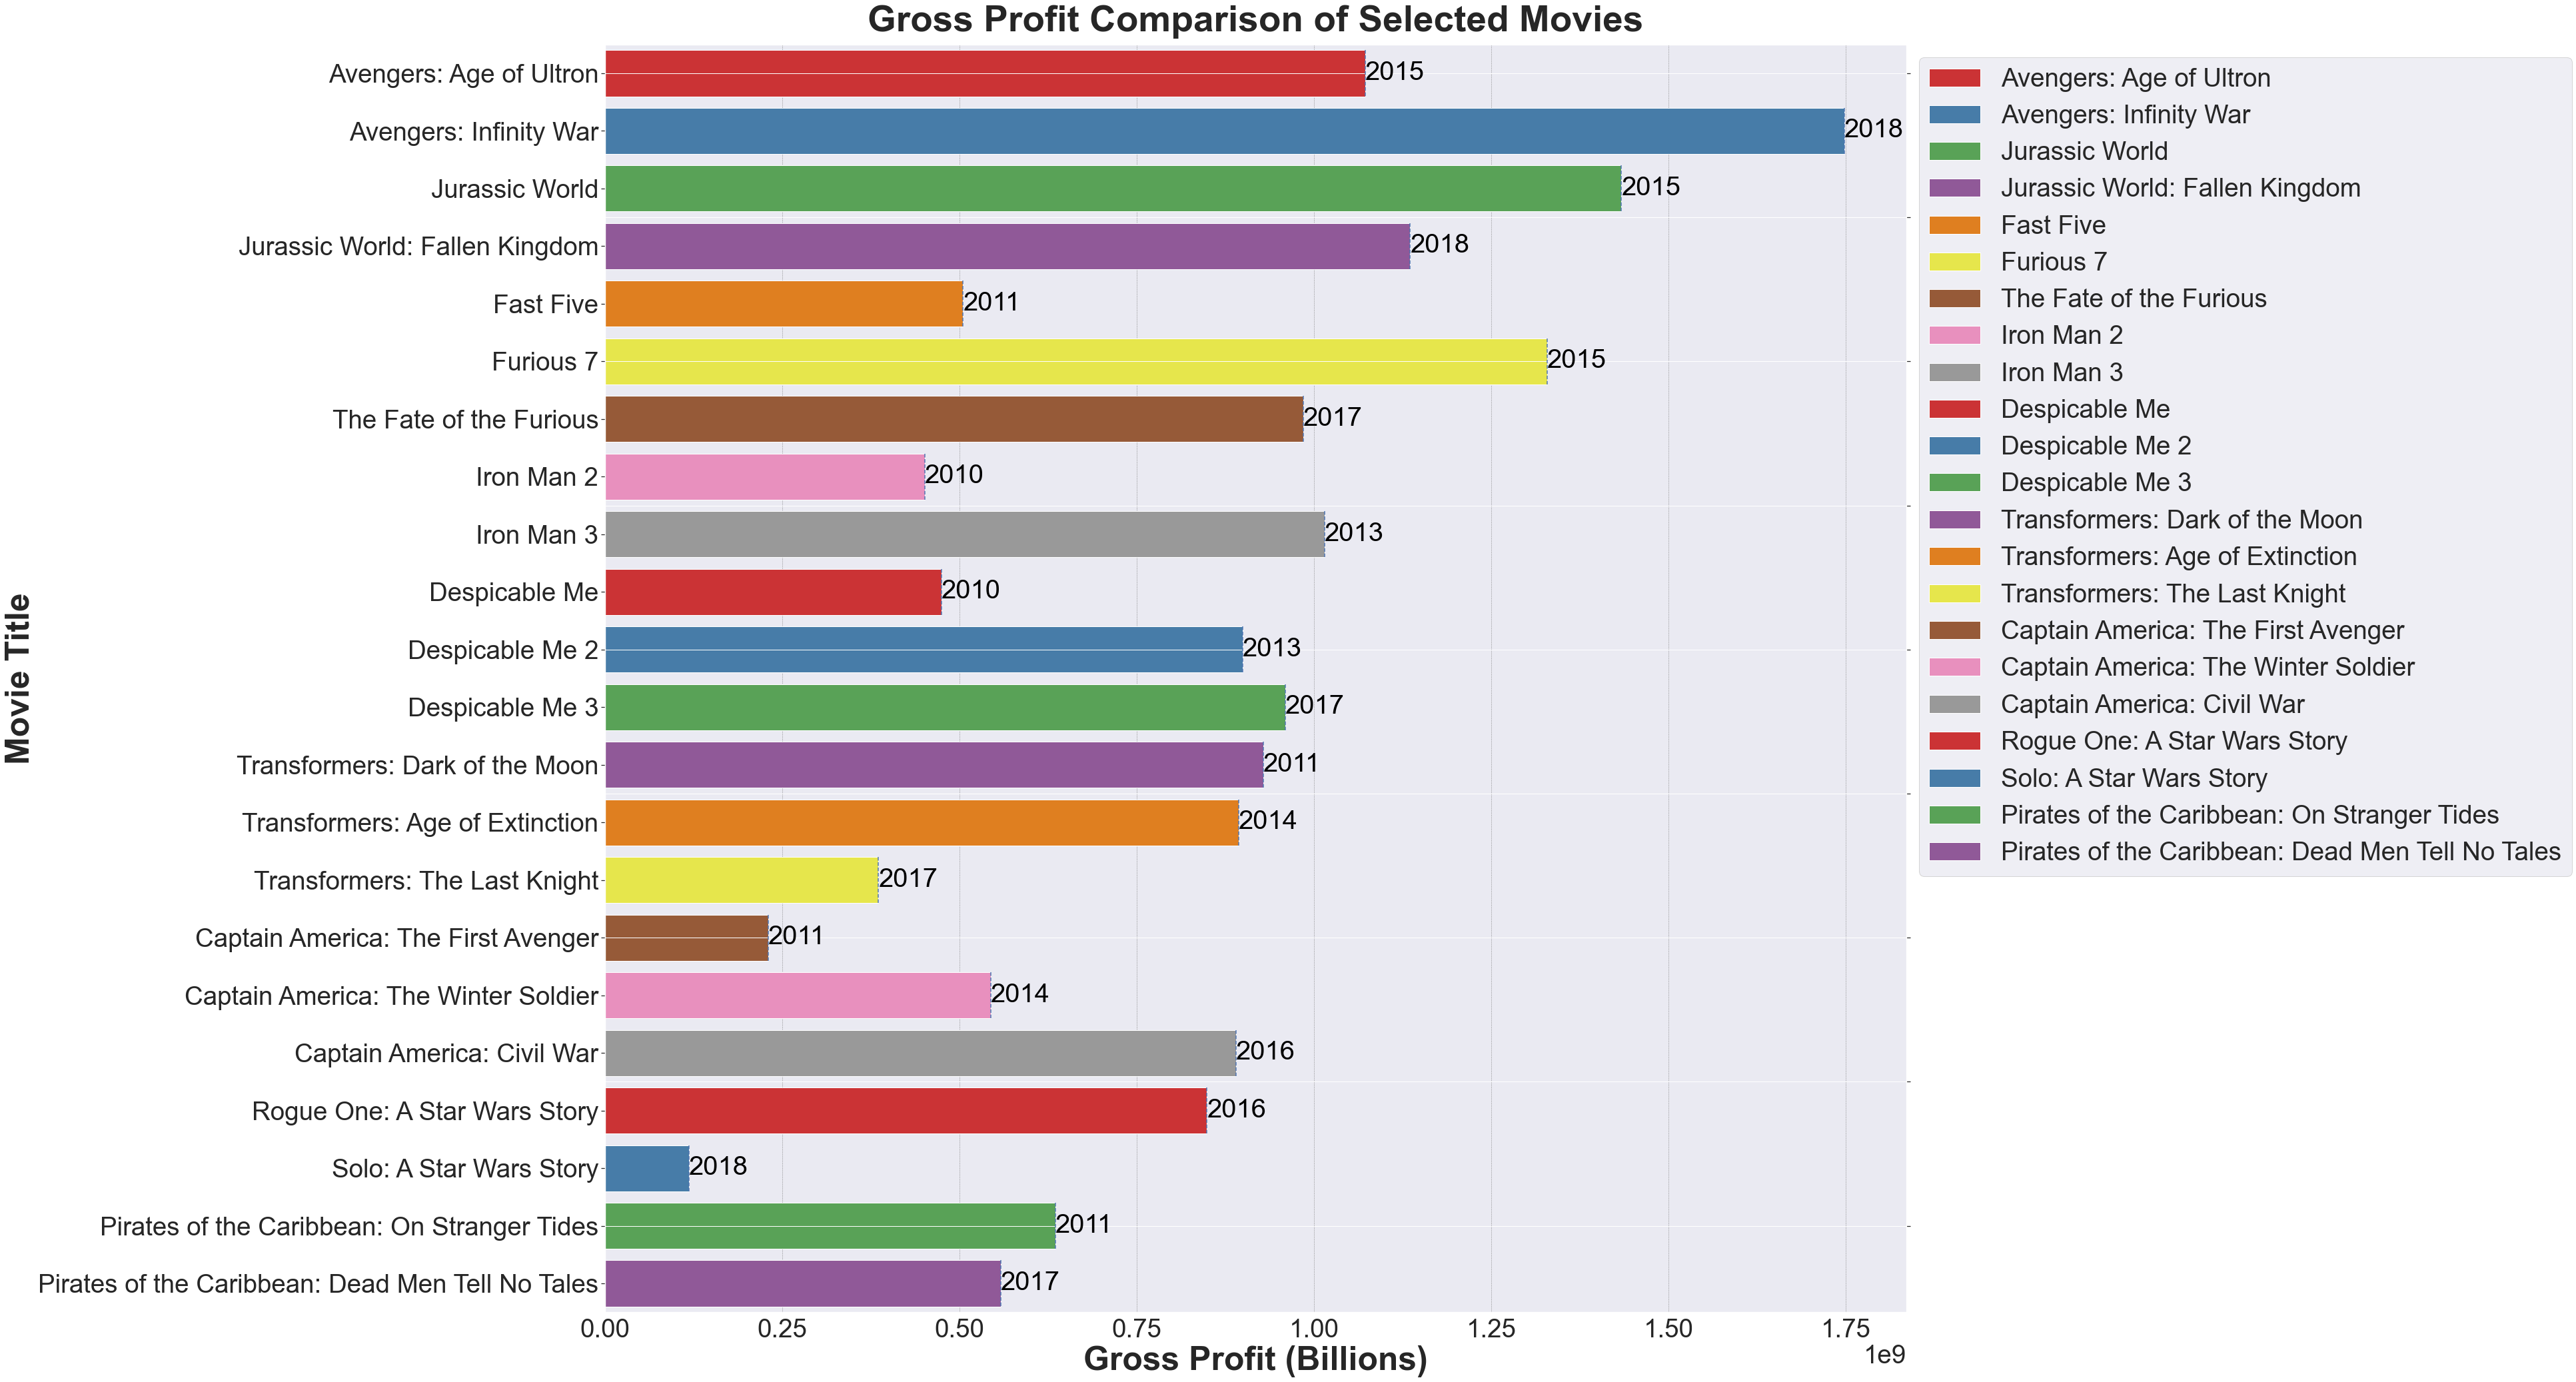

In [214]:
# Plot the gross profit earned for the selected movies
sns.set(font_scale=3.5)

plt.figure(figsize=(35, 35))

ax = sns.barplot(x='gross_profit', y='title', data=all_movies_data, orient='h', hue='title', palette='Set1', dodge=False)
plt.xlabel('Gross Profit (Billions)', fontsize=50, fontweight='bold')
plt.ylabel('Movie Title', fontsize=50, fontweight='bold')
plt.title('Gross Profit Comparison of Selected Movies', fontsize=55, fontweight='bold', pad=20) 
plt.grid(axis='x', color='grey', linestyle='--', linewidth=0.5)  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax2 = ax.twinx()

for idx, movie_data in all_movies_data.iterrows():
    release_year = movie_data['year']
    ax2.vlines(movie_data['gross_profit'], idx - 0.4, idx + 0.4, linestyle='--')
    ax2.text(movie_data['gross_profit'], idx, str(release_year), va='center', ha='left', color='black', fontsize=40) 

ax2.set_ylim(ax.get_ylim())

ax2.set_yticklabels([])

plt.show()

# 2. Exploring the IMBD Title Basics & The Movie Database Dataset

IMBD and The Movie Database are online databases that contain information relating to movies and television shows including revenue, casts, ratings and more.

### IMBD

This data set contains 146144 entries relating to various movies from 2010 to 2115 and includes information the primary and original titles, start year, runtime minutes and genres.

In [127]:
imbd_tite_basics_df.head(3)

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   

   start_year  runtime_minutes              genres  
0        2013           175.00  Action,Crime,Drama  
1        2019           114.00     Biography,Drama  
2        2018           122.00               Drama

### The Movie Database

This data set contains 26517 entries relating to various movies from 2010 to 2115 and includes information the genreids, original language, title, popularity, release date, vote average and vote count.

In [128]:
tmdb_movies_df.head(3)

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1       33.53   2010-11-19   
1                      How to Train Your Dragon       28.73   2010-03-26   
2                                    Iron Man 2       28.52   2010-05-07   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1          7.70       10788  
1                      How to Train Your Dragon          7.70        7610  
2                                    Iron Man 2          6.80       12368

# Merging the Datasets

We merge the earnings dataframe to The Database (TMDB) and the IMDB datasets for feature engineering and to enable us analyse the relationship between vote average (ratings) and earnings, genre preferences and runtime minutes.


We perform an inner merge on the earnings dataframe with the TMDB dataframe on the 'title' column then perform another inner merge on the merged dataframe with the IMDB dataframe on the original title column. As the final step we select the columns we would like to use for our analysis.

We will inspect, clean and analyze this dataset and exclude any data that may adversely impact the results of our analysis.

In [129]:
# Merge earnings_df_filtered and tmdb_movies_df on the 'title' column
genres_df = earnings_df_filtered.merge(tmdb_movies_df[['title', 'popularity', 'vote_average', 'vote_count']], on='title', how='inner')

# Merge with imbd_tite_basics_df on the 'original_title' column
genres_df = genres_df.merge(imbd_tite_basics_df[['original_title', 'runtime_minutes', 'genres']], left_on='title', right_on='original_title', how='inner')

# Retain only the specified columns
genres_df = genres_df[['title', 'studio', 'domestic_gross', 'foreign_gross', 'gross_profit', 'year',
                       'popularity', 'vote_average', 'vote_count', 'runtime_minutes', 'genres']]

# Data Inspection

We make the following observations:

There are a total of 1872  entries (equal to our number of rows) and 11 columns.
We have 3 columns with entries of the float datatype, 5 columns with entries of integer datatype and 3 of object datatype. The entries in the columns are all of the expected datatype.
There appear to be some missing entries in the runtime_minutes and genres columns.

We shall confirm our findings and determine how to handle the missing values in the next column.

In [130]:
genres_df.head(3)

title studio  domestic_gross  foreign_gross  gross_profit  \
0          Toy Story 3     BV       415004880      653874642     868879522   
1            Inception     WB       292576195      542948447     675524642   
2  Shrek Forever After   P/DW       238736787      517507886     591244673   

   year  popularity  vote_average  vote_count  runtime_minutes  \
0  2010       24.45          7.70        8340           103.00   
1  2010       27.92          8.30       22186           148.00   
2  2010       15.04          6.10        3843            93.00   

                       genres  
0  Adventure,Animation,Comedy  
1     Action,Adventure,Sci-Fi  
2  Adventure,Animation,Comedy

In [131]:
genres_df.tail(3)

title studio  domestic_gross  foreign_gross  gross_profit  year  \
1869         Mandy    RLJ         1214525         213131      -4572344  2018   
1870  Lean on Pete    A24         1163056        1291971      -5544973  2018   
1871  Lean on Pete    A24         1163056        1291971      -5544973  2018   

      popularity  vote_average  vote_count  runtime_minutes  \
1869       16.24          6.20         618           121.00   
1870        9.31          6.90         133           121.00   
1871        9.31          6.90         133           121.00   

                     genres  
1869  Action,Fantasy,Horror  
1870        Adventure,Drama  
1871        Adventure,Drama

In [132]:
# Find the shape of our dataset
genres_df.shape

print("Number of Rows:", genres_df.shape[0])
print("Number of Columns:", genres_df.shape[1])

Number of Rows: 1872
Number of Columns: 11


In [133]:
# Check for missing values in the dataframe
print("Are there missing values in the dataframe?", 
      genres_df.isnull().values.any())

Are there missing values in the dataframe? True


In [134]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 1871
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1872 non-null   object 
 1   studio           1872 non-null   object 
 2   domestic_gross   1872 non-null   int32  
 3   foreign_gross    1872 non-null   int32  
 4   gross_profit     1872 non-null   int32  
 5   year             1872 non-null   int64  
 6   popularity       1872 non-null   float64
 7   vote_average     1872 non-null   float64
 8   vote_count       1872 non-null   int64  
 9   runtime_minutes  1750 non-null   float64
 10  genres           1840 non-null   object 
dtypes: float64(3), int32(3), int64(2), object(3)
memory usage: 153.6+ KB


The 'runtime minutes' column is missing 122

In [135]:
# Sum the total missing values in each column
genre_miss_values = genres_df.isnull().sum()
genre_miss_values 

title                0
studio               0
domestic_gross       0
foreign_gross        0
gross_profit         0
year                 0
popularity           0
vote_average         0
vote_count           0
runtime_minutes    122
genres              32
dtype: int64

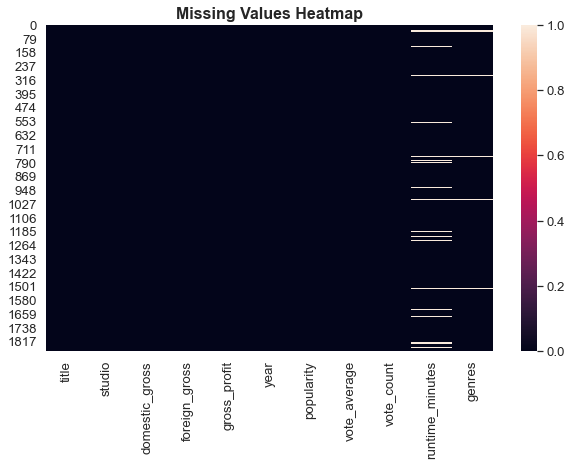

In [136]:
# Plot missing values on a heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.heatmap(genres_df.isnull())
plt.title("Missing Values Heatmap", fontsize=16, fontweight='bold')

plt.show()

title             0.00
studio            0.00
domestic_gross    0.00
foreign_gross     0.00
gross_profit      0.00
year              0.00
popularity        0.00
vote_average      0.00
vote_count        0.00
runtime_minutes   9.78
genres            2.57
dtype: float64


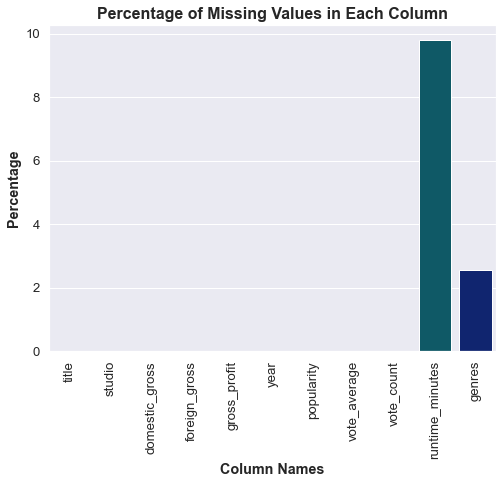

In [137]:
# Find the percentage of missing values in each column
genre_perc_msng_values = genres_df.isnull().sum()\
                    * 100 / len (earnings_df)
print(genre_perc_msng_values) 

# Plot the percentage of missing values in a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_perc_msng_values.index, y=genre_perc_msng_values.values, palette='dark')
plt.title("Percentage of Missing Values in Each Column", fontsize=16, fontweight='bold')
plt.ylabel("Percentage", fontweight='bold')
plt.xlabel("Column Names", fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [138]:
# Identify the row with the null value
genres_df[genres_df.isna().any(axis=1)]

title   studio  domestic_gross  foreign_gross  gross_profit  \
15           Robin Hood     Uni.       105487148      216971858     112459006   
20           Robin Hood     Uni.       105487148      216971858     112459006   
25           Robin Hood     Uni.       105487148      216971858     112459006   
30           Robin Hood     Uni.        30824628       53922813     -14252559   
35           Robin Hood     Uni.        30824628       53922813     -14252559   
...                 ...      ...             ...            ...           ...   
1752         Game Night  WB (NL)        69179066       48199018      80378084   
1825  Life of the Party  WB (NL)        53059911       12700000      35759911   
1828             Adrift      STX        31445011       26452180      22897191   
1831             Adrift      STX        31445011       26452180      22897191   
1854            Upgrade  BH Tilt        11977130        4576155      13553285   

      year  popularity  vote_average  vote_count  runtime_minutes  genres  
15    2010       15.44          6.30        2569              nan     NaN  
20    2010        0.68          5.70           3              nan     NaN  
25    2010       39.98          5.80        1194              nan     NaN  
30    2018       15.44          6.30        2569              nan     NaN  
35    2018        0.68          5.70           3              nan     NaN  
...    ...         ...           ...         ...              ...     ...  
1752  2018       19.46          6.90        2756              nan  Comedy  
1825  2018       13.70          6.20         435              nan  Comedy  
1828  2018        0.60          7.00           1              nan   Drama  
1831  2018       16.79          6.70        1264              nan   Drama  
1854  2018       21.41          7.40        1326              nan   Drama  

[125 rows x 11 columns]

In [139]:
# Check for duplicates
genre_dup_values = genres_df.duplicated().any()
print("Are there any duplicate values?", genre_dup_values)

Are there any duplicate values? True


In [140]:
genres_df[genres_df.duplicated()]

title  studio  domestic_gross  foreign_gross  \
168          Blue Valentine   Wein.         9737892        6828348   
230   The Girl on the Train  Strand        75395035       98883179   
231   The Girl on the Train  Strand        75395035       98883179   
232   The Girl on the Train  Strand        75395035       98883179   
294                 Unknown      WB        63686397       72436686   
...                     ...     ...             ...            ...   
1657     The Lost City of Z     BST         8574339        8547484   
1661  Roman J. Israel, Esq.    Sony        11962712        1004300   
1664    Battle of the Sexes    FoxS        12638526        5806853   
1672   Just Getting Started      BG         6069605         686807   
1871           Lean on Pete     A24         1163056        1291971   

      gross_profit  year  popularity  vote_average  vote_count  \
168       15566240  2010        8.99          6.90        1677   
230      129278214  2016       11.93          6.30        3479   
231      129278214  2016       11.93          6.30        3479   
232      129278214  2016       11.93          6.30        3479   
294       96123083  2011       12.08          6.60        2043   
...            ...   ...         ...           ...         ...   
1657     -12878177  2017       11.05          6.20        1397   
1661      -9032988  2017       12.69          6.20         499   
1664      -6554621  2017       11.99          6.90        1045   
1672     -15243588  2017        8.46          4.90          94   
1871      -5544973  2018        9.31          6.90         133   

      runtime_minutes                     genres  
168            112.00              Drama,Romance  
230             80.00                   Thriller  
231            112.00        Crime,Drama,Mystery  
232               nan    Horror,Mystery,Thriller  
294               nan                        NaN  
...               ...                        ...  
1657           141.00  Adventure,Biography,Drama  
1661           122.00       Crime,Drama,Thriller  
1664           121.00     Biography,Comedy,Drama  
1672            91.00              Action,Comedy  
1871           121.00            Adventure,Drama  

[170 rows x 11 columns]

# Data Cleaning & Preparation

We drop the missing values from the genre and runtime minute columns in a bid to avoid potentially skewing the data given that each genre would have different runtime minutes and also noting that we may not be able to accurately identify the correct genre to fill into the missing rows. 

In [141]:
# Drop the rows with null values
genres_df = genres_df.dropna()

In [142]:
# Drop rows with duplicated values
genres_df = genres_df.drop_duplicates()

In [143]:
# Display summary information about the dataframe
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 0 to 1870
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1592 non-null   object 
 1   studio           1592 non-null   object 
 2   domestic_gross   1592 non-null   int32  
 3   foreign_gross    1592 non-null   int32  
 4   gross_profit     1592 non-null   int32  
 5   year             1592 non-null   int64  
 6   popularity       1592 non-null   float64
 7   vote_average     1592 non-null   float64
 8   vote_count       1592 non-null   int64  
 9   runtime_minutes  1592 non-null   float64
 10  genres           1592 non-null   object 
dtypes: float64(3), int32(3), int64(2), object(3)
memory usage: 130.6+ KB


# Filtering the Dataframe

Looking through the dataframe we observe multile duplicates, we therefore filter the dataframe for unique values only to enable us have cleaner data.

In [144]:
genres_df[genres_df.duplicated(subset='title', keep=False)].head()

title studio  domestic_gross  foreign_gross  gross_profit  year  \
12  Robin Hood   Uni.       105487148      216971858     112459006  2010   
13  Robin Hood   Uni.       105487148      216971858     112459006  2010   
14  Robin Hood   Uni.       105487148      216971858     112459006  2010   
16  Robin Hood   Uni.       105487148      216971858     112459006  2010   
17  Robin Hood   Uni.       105487148      216971858     112459006  2010   

    popularity  vote_average  vote_count  runtime_minutes  \
12       15.44          6.30        2569           140.00   
13       15.44          6.30        2569            92.00   
14       15.44          6.30        2569           116.00   
16       15.44          6.30        2569            60.00   
17        0.68          5.70           3           140.00   

                       genres  
12     Action,Adventure,Drama  
13               Action,Drama  
14  Action,Adventure,Thriller  
16   Action,Adventure,History  
17     Action,Adventure,Drama

In [145]:
# Drop duplicates based on the 'title' column
unique_genres_df = genres_df.drop_duplicates(subset='title').copy()

# Feature Understanding - Univariate Analysis

In [146]:
unique_genres_df.describe()

domestic_gross  foreign_gross  gross_profit    year  popularity  \
count         1127.00        1127.00       1127.00 1127.00     1127.00   
mean      63317097.40    95756080.84  110141771.83 2013.68       13.30   
std       85380753.94   159200515.04  195655097.75    2.51        7.90   
min              0.00           0.00 -110450242.00 2010.00        0.60   
25%       10145701.00     6941789.50    3718800.50 2011.00        8.62   
50%       35608245.00    30013217.00   35768579.00 2014.00       11.52   
75%       78406278.00   103508067.00  124433929.00 2016.00       15.97   
max      700059566.00  1369318718.00 1748134200.00 2018.00       80.77   

       vote_average  vote_count  runtime_minutes  
count       1127.00     1127.00          1127.00  
mean           6.36     2273.06           108.18  
std            0.85     2894.77            18.79  
min            1.00        1.00             6.00  
25%            5.90      442.50            96.00  
50%            6.40     1211.00           106.00  
75%            6.90     2879.50           118.00  
max           10.00    22186.00           180.00

## Runtime Minutes: Distribution

The runtime is normally distributed, we observe that majority of the runtimes are centred around the mean.

107.00    34
105.00    34
103.00    33
106.00    33
100.00    32
Name: runtime_minutes, dtype: int64


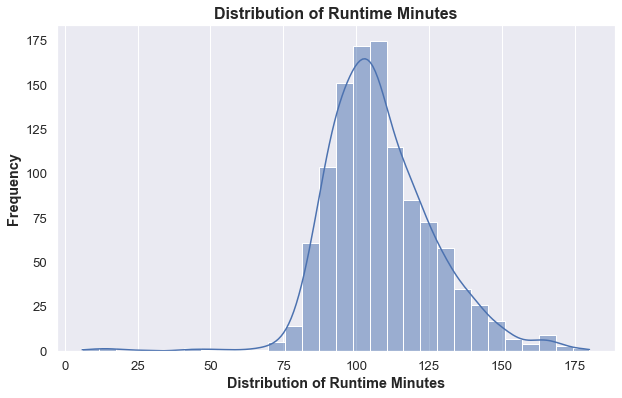

In [147]:
# Print the runtime_minutes values counts
print(unique_genres_df['runtime_minutes'].value_counts()\
      .sort_values(ascending=False).head())

# Plot the distribution of runtime_minutes
plt.figure(figsize=(10, 6))
sns.histplot(unique_genres_df['runtime_minutes'], bins=30, kde=True)
plt.xlabel('Distribution of Runtime Minutes', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Runtime Minutes', fontsize=16, fontweight='bold')
plt.grid(axis='y')

plt.show()

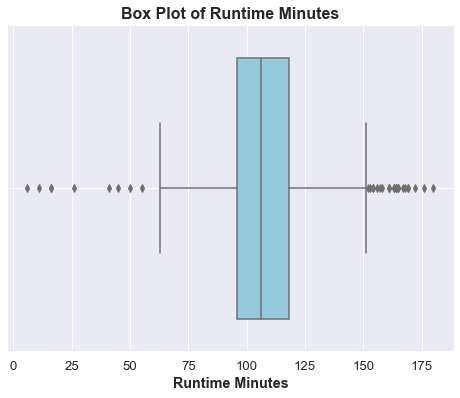

In [148]:
# Plot a box plot for runtime_minutes
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.boxplot(data=unique_genres_df, x='runtime_minutes', color='skyblue')
plt.title('Box Plot of Runtime Minutes', fontsize=16, fontweight='bold')
plt.xlabel('Runtime Minutes', fontweight='bold')
plt.grid(True)

plt.show()

## Vote Average: Distribution

The vote average is normally distributed, we observe that majority of the runtimes are centred around the mean.

6.10    64
6.20    63
5.90    58
6.70    57
6.60    55
Name: vote_average, dtype: int64


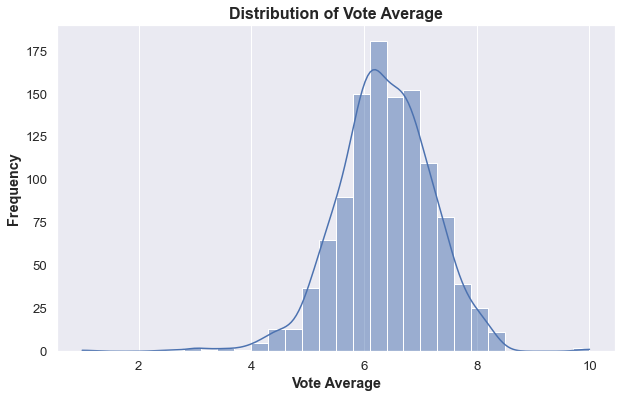

In [149]:
# Print the vote_average values counts
print(unique_genres_df['vote_average'].value_counts()\
      .sort_values(ascending=False).head())

# Plot the distribution of vote_average
plt.figure(figsize=(10, 6))
sns.histplot(unique_genres_df['vote_average'], bins=30, kde=True)
plt.xlabel('Vote Average', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Vote Average', fontsize=16, fontweight='bold')
plt.grid(axis='y')

plt.show()

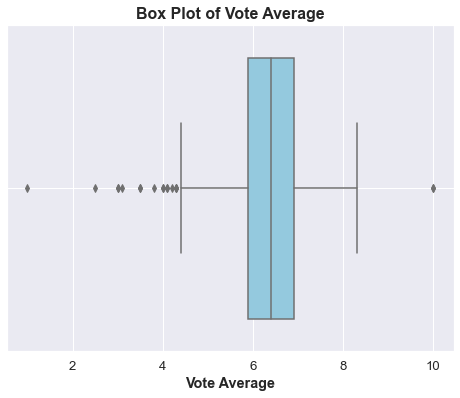

In [150]:
# Plot a box plot for vote_average
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.boxplot(data=unique_genres_df, x='vote_average', color='skyblue')
plt.title('Box Plot of Vote Average', fontsize=16, fontweight='bold')
plt.xlabel('Vote Average', fontweight='bold')
plt.grid(True)

plt.show()

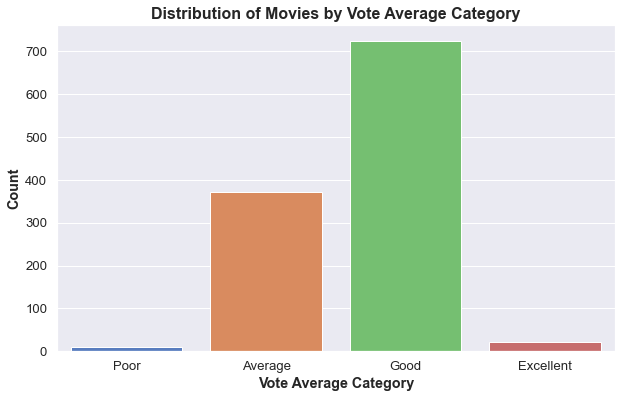

In [151]:
# Plot the distribution of vote average by category
bins = [0, 4, 6, 8, 10]

# Create a new column 'vote_category' based on the vote_average
unique_genres_df['vote_category'] = pd.cut(unique_genres_df['vote_average'], bins=bins, labels=['Poor', 'Average', 'Good', 'Excellent'])

# Plot the count of movies in each vote_average category
plt.figure(figsize=(10, 6))
sns.countplot(x='vote_category', data=unique_genres_df, palette='muted')
plt.xlabel('Vote Average Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Distribution of Movies by Vote Average Category', fontsize=16, fontweight='bold')

plt.show()

## Vote Count: Distribution

The Vote Count is skewed to the right, with majority of the vote counts being under 3,000

1      11
2       6
12      4
150     4
57      3
Name: vote_count, dtype: int64


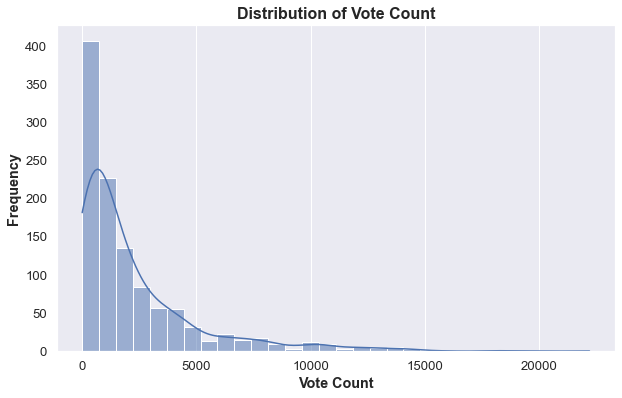

In [152]:
# Print the vote_count values counts
print(unique_genres_df['vote_count'].value_counts()\
      .sort_values(ascending=False).head())

# Plot the distribution of vote_count
plt.figure(figsize=(10, 6))
sns.histplot(unique_genres_df['vote_count'], bins=30, kde=True)
plt.xlabel('Vote Count', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Vote Count', fontsize=16, fontweight='bold')
plt.grid(axis='y')

plt.show()

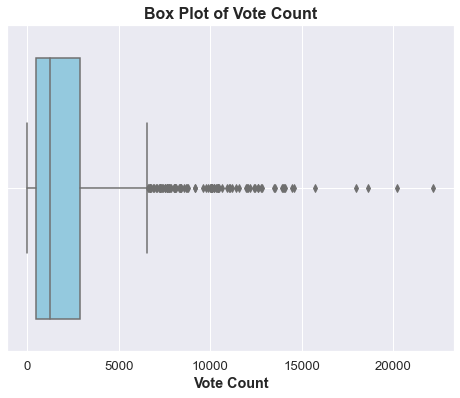

In [153]:
# Plot a box plot for vote_count
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.boxplot(data=unique_genres_df, x='vote_count', color='skyblue')
plt.title('Box Plot of Vote Count', fontsize=16, fontweight='bold')
plt.xlabel('Vote Count', fontweight='bold')
plt.grid(True)

plt.show()

# Feature Relationships

## Correlation Between the Numeric Features

We observe that our features are all positively correlated although the correlation of majority are rather weak. We observe the strongest correlation between gross profit and vote count. Implying that as vote count increases so does profit and vice versa. We are cognsiant of the fact that correlation does not mean causation thus a multitude of factors may affect the gross profit earned.

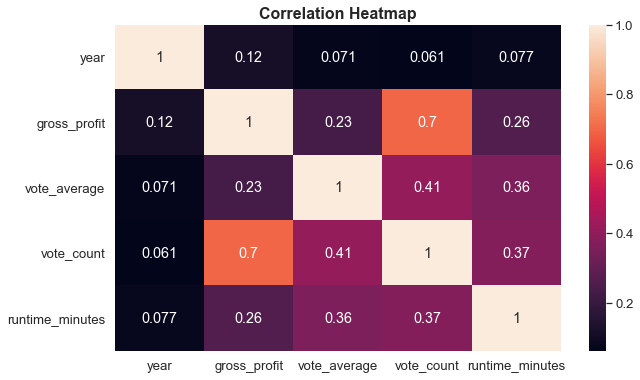

In [154]:
# Plot the correlation between the numeric features

plt.figure(figsize=(10, 6))
sns.heatmap(unique_genres_df[['year', 'gross_profit', 'vote_average', 'vote_count', 'runtime_minutes']].corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

plt.show()

## Annual Trend Analysis: Runtime Minutes

We observe a dip in runtime minutes in 2016. Runtime minutes increase in the subsequent years possibly accredited to the increased number of franchise releases which tend to have longer runtimes

In [155]:
# Display the average runtime_minutes over the years
average_runtime_per_year = unique_genres_df.groupby('year')['runtime_minutes'].mean().reset_index()
average_runtime_per_year

year  runtime_minutes
0  2010           104.17
1  2011           106.47
2  2012           108.23
3  2013           109.89
4  2014           109.67
5  2015           109.45
6  2016           106.94
7  2017           109.73
8  2018           111.03

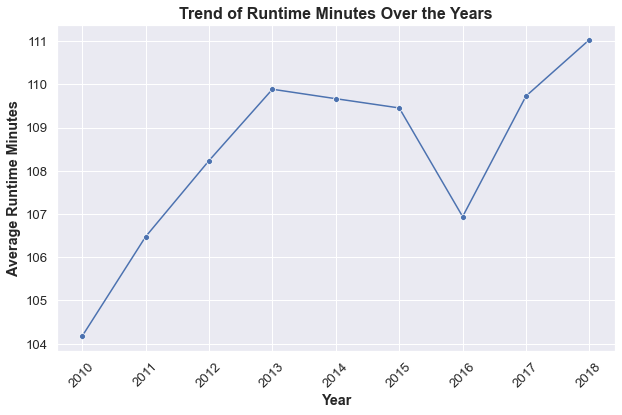

In [156]:
# Plot the trend of average runtime_minutes over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_runtime_per_year, x='year', y='runtime_minutes', marker='o', color='b')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Runtime Minutes', fontweight='bold')
plt.title('Trend of Runtime Minutes Over the Years', fontsize=16, fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Annual Trend Analysis: Vote Count

We observe that there is a variation of vote count over the years. This may correlate with various factors including cinema attendance, the number of movies release in a given year, etc. Further research would need to be done to identify the cause.

In [157]:
# Find the average vote_count per year
average_vote_count_per_year = unique_genres_df.groupby('year')['vote_count'].mean().reset_index()
average_vote_count_per_year

year  vote_count
0  2010     1841.07
1  2011     1675.83
2  2012     2251.87
3  2013     2670.36
4  2014     2803.92
5  2015     2351.51
6  2016     2541.22
7  2017     2639.82
8  2018     1827.56

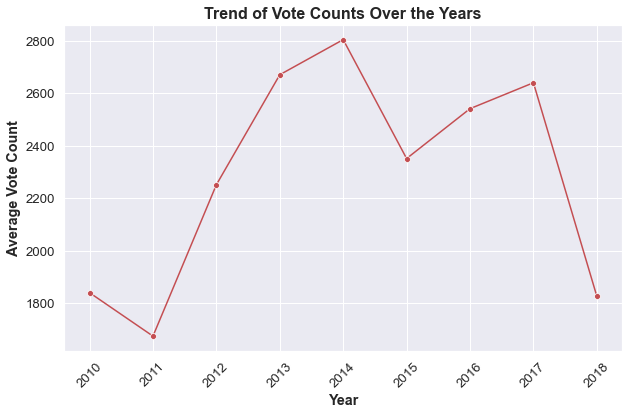

In [158]:
# Plot the trend of average vote_count over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_vote_count_per_year, x='year', y='vote_count', marker='o', color='r')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Vote Count', fontweight='bold')
plt.title('Trend of Vote Counts Over the Years', fontsize=16, fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Annual Trend Analysis: Vote Average

We observe steady growth in vote average over the years with the exception of 2014 where there was a spike in vote average due to a high number of ratings 70 in total receiving votes of 6.34 and above.

In [159]:
# Find the average vote_average per year
average_vote_average_per_year = unique_genres_df.groupby('year')['vote_average'].mean().reset_index()
average_vote_average_per_year

year  vote_average
0  2010          6.28
1  2011          6.26
2  2012          6.31
3  2013          6.33
4  2014          6.50
5  2015          6.36
6  2016          6.39
7  2017          6.41
8  2018          6.46

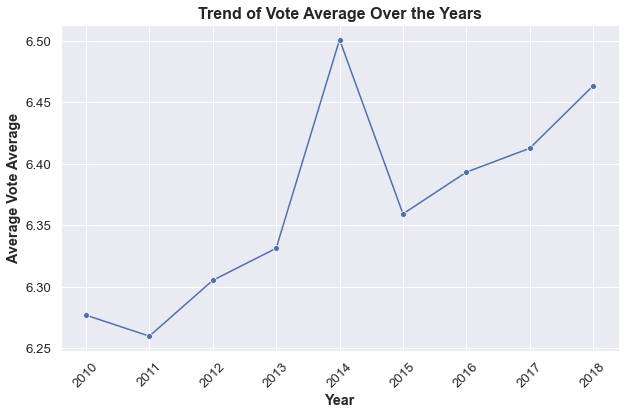

In [160]:
# Plot the trend of average vote_average over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_vote_average_per_year, x='year', y='vote_average', marker='o', color='b')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Vote Average', fontweight='bold')
plt.title('Trend of Vote Average Over the Years', fontsize=16, fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [161]:
# Find movies in 2014 with a vote average above 6.34
movies_2014 = unique_genres_df[unique_genres_df['year'] == 2014]

high_vote_movies_2014 = movies_2014[movies_2014['vote_average'] > 6.34]
high_vote_movies_2014[['title', 'vote_average']].sort_values(by='vote_average', ascending=False)

title  vote_average
822              Interstellar          8.20
856        The Imitation Game          8.10
867  The Grand Budapest Hotel          8.00
815   Guardians of the Galaxy          7.90
877  The Theory of Everything          7.90
..                        ...           ...
921                    Oculus          6.40
972                 Palo Alto          6.40
832    Penguins of Madagascar          6.40
905                Son of God          6.40
954              The Babadook          6.40

[70 rows x 2 columns]

## Movies: Highest Vote Average

Below are the top 10 movies with the highest vote average (ratings).

In [162]:
# Display the movies with the top 10 highest vote_average
highest_vote_average_movies = unique_genres_df.nlargest(10, 'vote_average')
highest_vote_average_movies[['title', 'vote_average', 'studio']].head()

title  vote_average studio
1374                   Nerve         10.00    LGF
1817               Book Club         10.00   Par.
1                  Inception          8.30     WB
963                    Mommy          8.30  RAtt.
1711  Avengers: Infinity War          8.30     BV

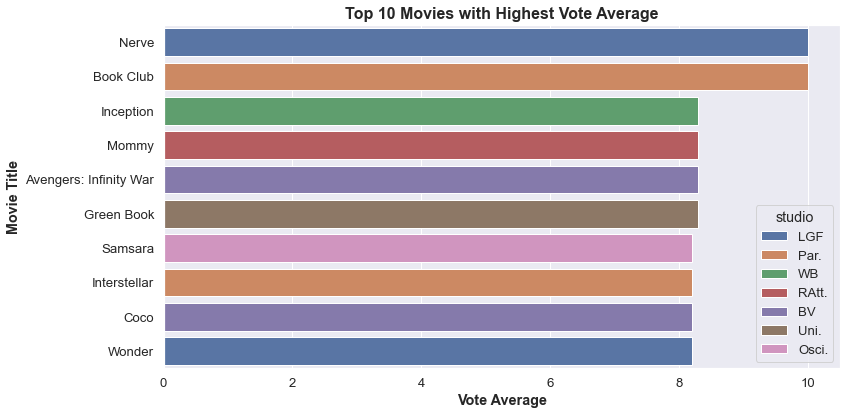

In [163]:
# Plot the movies with the top 10 highest vote_average
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average', y='title', data=highest_vote_average_movies, hue='studio', dodge=False)
plt.xlabel('Vote Average', fontweight='bold')
plt.ylabel('Movie Title', fontweight='bold')
plt.title('Top 10 Movies with Highest Vote Average', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

## Movies Highest Vote Count

We observe that only one of the movies among the top 10 highest average vote count is observed amond the  movies with the highest vote count, which is Inception. This indiactes that there is little correlation between the two features. Considering that more often audiences may have the tendency to vote (rate) a film which they found faults in or were disappointed by rather than the alternative.

In [164]:
# Display the top 10 movies with the highest vote_count
highest_vote_count_movies = unique_genres_df.nlargest(10, 'vote_count')
highest_vote_count_movies[['title', 'vote_average', 'studio']].head()

title  vote_average studio
1                   Inception          8.30     WB
1287                 Deadpool          7.60    Fox
822              Interstellar          8.20   Par.
815   Guardians of the Galaxy          7.90     BV
453          Django Unchained          8.00  Wein.

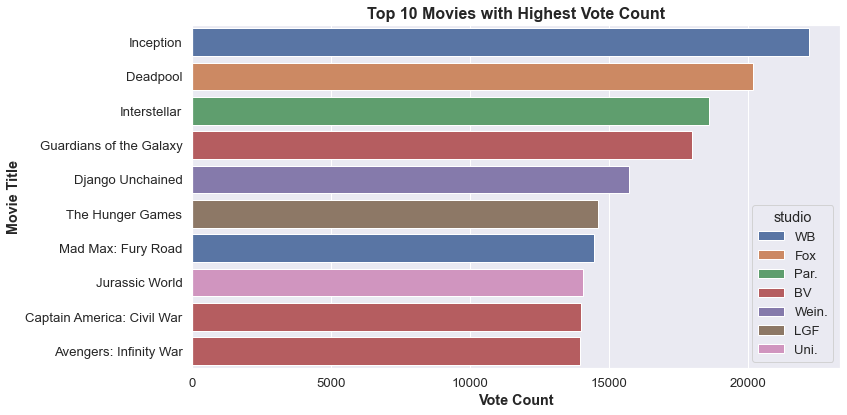

In [165]:
# Plot the top 10 movies with the highest vote_count
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

plt.figure(figsize=(12, 6))
sns.barplot(x='vote_count', y='title', data=highest_vote_count_movies, hue='studio', dodge=False)
plt.xlabel('Vote Count', fontweight='bold')
plt.ylabel('Movie Title', fontweight='bold')
plt.title('Top 10 Movies with Highest Vote Count', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

## Vote Average vs. Earnings & Gross Profit

The correlation coefficient varies between 0.20 and 0.22 against our variables which suggests a weak positive relationship between vote average and profit. This means that, on average, as the vote average increases, there is a slight tendency for the profit to increase as well. However, the correlation is not very strong, and there could be a lot of variability in profit even for movies with similar vote averages.

In [168]:
# Find the correlation co-efficient vote_average and domestic_gross
dom_correl_coefficient = unique_genres_df['vote_average'].corr(unique_genres_df['domestic_gross'])
print("Correlation Coefficient between Vote Average and Domestic Gross Earnings:", dom_correl_coefficient)

Correlation Coefficient between Vote Average and Domestic Gross Earnings: 0.21635046760387736


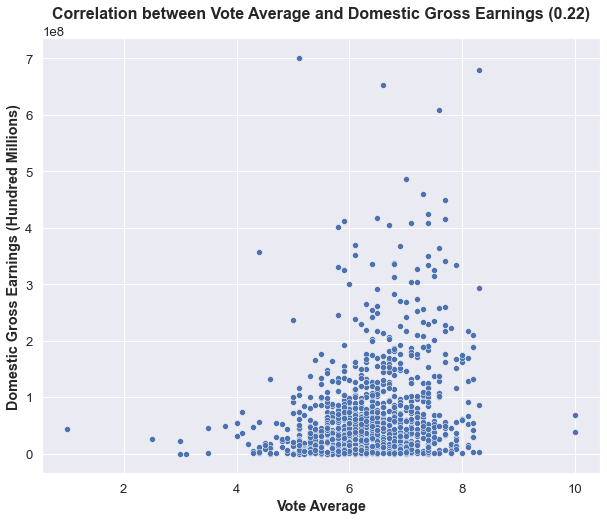

In [169]:
# Plot the correlation co-efficient vote_average and domestic_gross
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='vote_average', y='domestic_gross', data=unique_genres_df)
plt.xlabel('Vote Average', fontweight='bold')
plt.ylabel('Domestic Gross Earnings (Hundred Millions)', fontweight='bold')
plt.title('Correlation between Vote Average and Domestic Gross Earnings (0.22)', fontsize=16, fontweight='bold', pad=20)

plt.show()

In [170]:
# Find the correlation co-efficient vote_average and foreign_gross
for_correl_coefficient = unique_genres_df['vote_average'].corr(unique_genres_df['foreign_gross'])
print("Correlation Coefficient between Vote Average and Foreign Gross Earnings:", for_correl_coefficient)

Correlation Coefficient between Vote Average and Foreign Gross Earnings: 0.2003018339647574


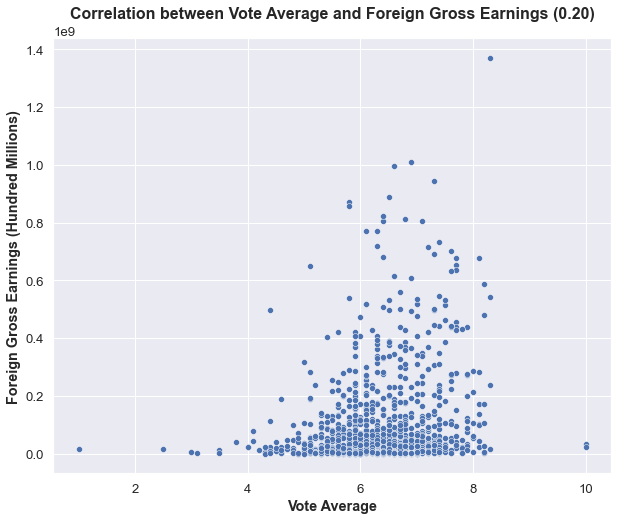

In [171]:
# Plot the correlation co-efficient vote_average and foreign_gross
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='vote_average', y='foreign_gross', data=unique_genres_df)
plt.xlabel('Vote Average', fontweight='bold')
plt.ylabel('Foreign Gross Earnings (Hundred Millions)', fontweight='bold')
plt.title('Correlation between Vote Average and Foreign Gross Earnings (0.20)', fontsize=16, fontweight='bold', pad=20)

plt.show()

In [172]:
# Find the correlation co-efficient vote_average and gross profit
gross_correl_coefficient = unique_genres_df['vote_average'].corr(unique_genres_df['gross_profit'])
print("Correlation Coefficient between Vote Average and Gross Profit:", gross_correl_coefficient)

Correlation Coefficient between Vote Average and Gross Profit: 0.23290861462674378


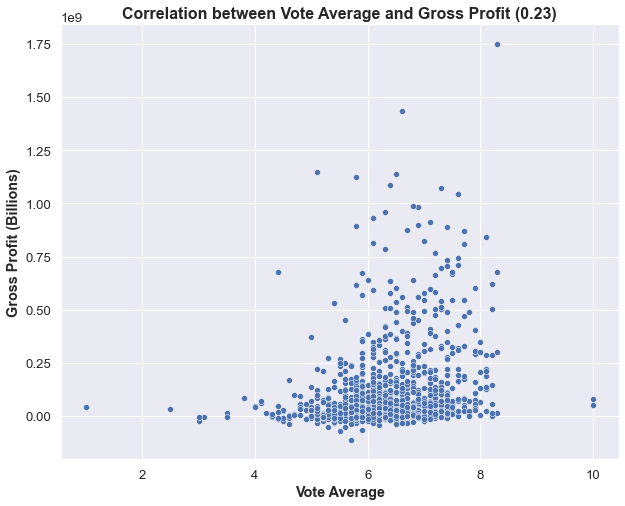

In [173]:
# Plot the correlation co-efficient vote_average and gross profit
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='vote_average', y='gross_profit', data=unique_genres_df)
plt.xlabel('Vote Average', fontweight='bold')
plt.ylabel('Gross Profit (Billions)', fontweight='bold')
plt.title('Correlation between Vote Average and Gross Profit (0.23)', fontsize=16, fontweight='bold')

plt.show()

## Genre Analysis: Most Popular

We perform three operations below usig for loops to enable us optain the most popular genres.

We find that the top 5 most highly produced genres of film in the dataset are,
* Drama - 574
* Comedy - 406
* Action - 333
* Adventure - 278
* Thriller - 193
We observe a combination of these genres also associated with the genres of the top 20 most profitable movies.

In [174]:
# Create a list to split the genre entries by commas
list1 = []
for value in unique_genres_df['genres']:
    list1.append(value.split(','))

In [175]:
# Create a list to split the lists of genres into one list
list2 = []
for item in list1:
    for item1 in item:
        list2.append(item1)

In [176]:
# Find the unigue genres in list2
unique_gerne_list = []
for item in list2:
    if item not in unique_gerne_list:
        unique_gerne_list.append(item)

In [177]:
from collections import Counter

In [186]:
Counter(list2)

Counter({'Adventure': 278,
         'Animation': 83,
         'Comedy': 406,
         'Action': 333,
         'Sci-Fi': 98,
         'Drama': 574,
         'Fantasy': 94,
         'Family': 70,
         'Thriller': 193,
         'Romance': 155,
         'Horror': 118,
         'Mystery': 97,
         'Western': 8,
         'Biography': 112,
         'Documentary': 19,
         'Crime': 177,
         'Sport': 20,
         'War': 10,
         'Music': 33,
         'Musical': 3,
         'History': 34})

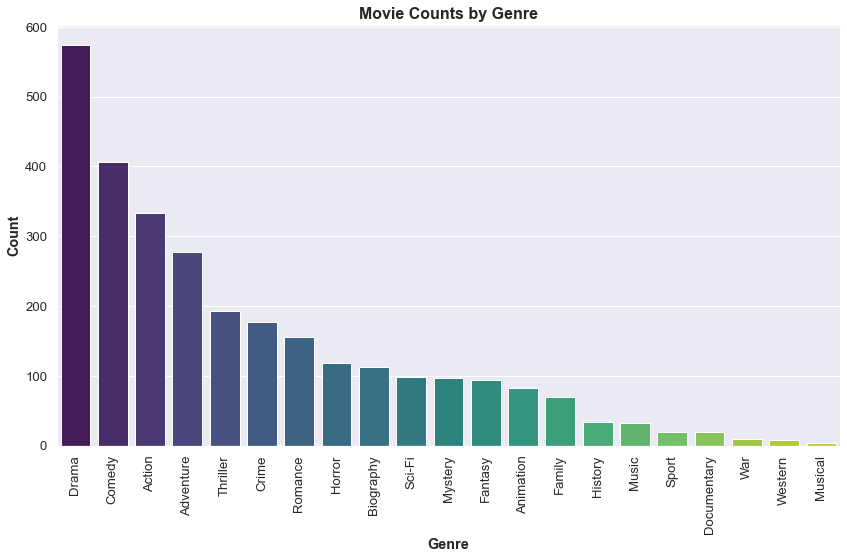

In [179]:
# Create data variable containing information from Counter
data = Counter({'Adventure': 278, 'Animation': 83, 'Comedy': 406, 'Action': 333, 'Sci-Fi': 98, 'Drama': 574,
                'Fantasy': 94, 'Family': 70, 'Thriller': 193, 'Romance': 155, 'Horror': 118, 'Mystery': 97,
                'Western': 8, 'Biography': 112, 'Documentary': 19, 'Crime': 177, 'Sport': 20, 'War': 10,
                'Music': 33, 'Musical': 3, 'History': 34})

# Convert data to DataFrame
data_df = pd.DataFrame(data.items(), columns=['Genre', 'Count'])
data_df = data_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='Count', data=data_df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Movie Counts by Genre', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

In [180]:
# Display the top genre for the most profitable movies
most_profitable_movies = unique_genres_df.nlargest(20, 'gross_profit')

# Extract and count the genres of the most profitable movies
most_profitable_genres = most_profitable_movies['genres'].str.split(', ').explode()
profit_genre_counts = most_profitable_genres.value_counts()

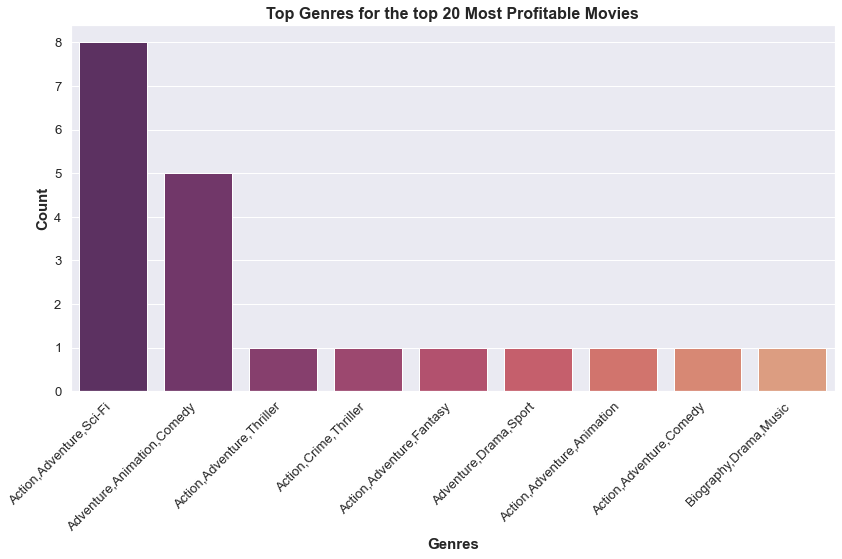

In [181]:
# Plot the genres attaributed to the 20 most profitable movies
plt.figure(figsize=(12, 8))
sns.barplot(x=profit_genre_counts.index, y=profit_genre_counts, palette='flare_r')
plt.xlabel('Genres', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('Top Genres for the top 20 Most Profitable Movies', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

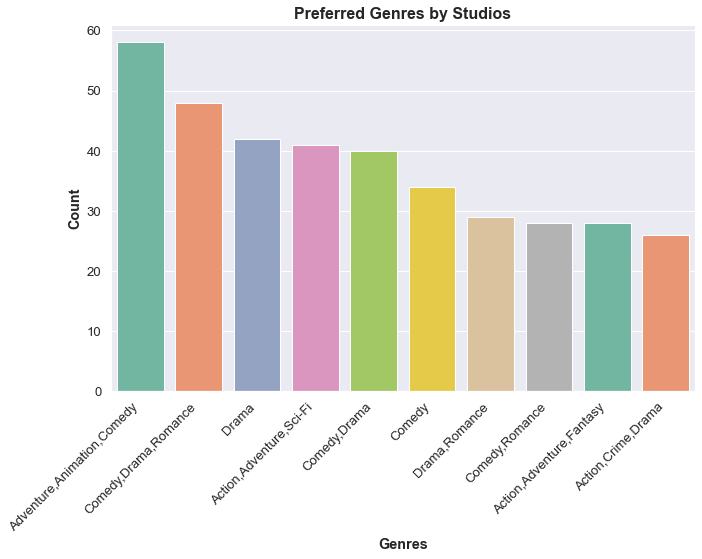

In [182]:
# Find the genre most preferred by  studios
# Extract and count the genres from all movies
all_genres = unique_genres_df['genres']
genre_counts = all_genres.str.split(', ').explode().value_counts().head(10)

# Plot the genre most preferred by  studios
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.index, y=genre_counts, palette='Set2')
plt.xlabel('Genres', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Preferred Genres by Studios', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##  Runtime Minutes: Movies with the Longest Runtime & Most Profitable Movies

While the average runtime for movies in the dataset is 108 minutes, we find that the top 10 most profitable movies go far beyond the mean, the run times ranging from 134 - 165 minutes. This may be accredited to audience demands for longer more engaging films

In [215]:
# Find the top 10 movies with the highest runtime_minutes
top_10_runtime_movies = unique_genres_df.nlargest(10, 'runtime_minutes')
top_10_runtime_movies[['title', 'runtime_minutes']]

title  runtime_minutes
642             The Wolf of Wall Street           180.00
606                    Jab Tak Hai Jaan           176.00
490                         Cloud Atlas           172.00
441   The Hobbit: An Unexpected Journey           169.00
822                        Interstellar           169.00
1057                  The Hateful Eight           168.00
1572        Baahubali 2: The Conclusion           167.00
453                    Django Unchained           165.00
813     Transformers: Age of Extinction           165.00
920                             Boyhood           165.00

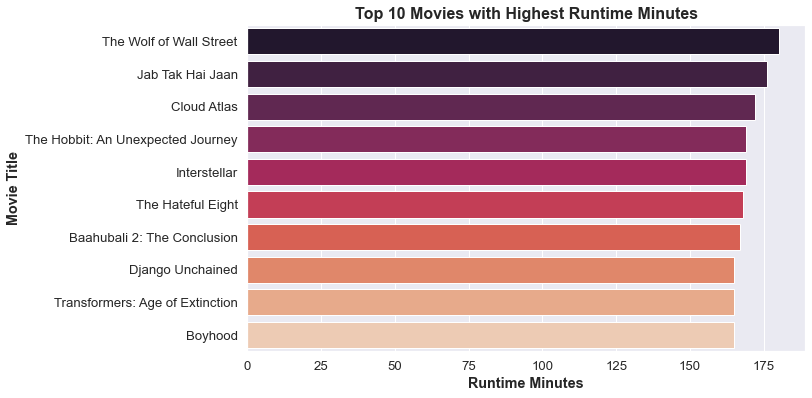

In [216]:
# Plot top 10 movies with the highest runtime_minutes
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.barplot(x='runtime_minutes', y='title', data=top_10_runtime_movies, palette='rocket')
plt.xlabel('Runtime Minutes', fontweight='bold')
plt.ylabel('Movie Title', fontweight='bold')
plt.title('Top 10 Movies with Highest Runtime Minutes', fontsize=16, fontweight='bold')

plt.show()

In [183]:
# Find the runtime_minutes for the top most profitable movies
profitable_movies_runtime = most_profitable_movies[['title', 'runtime_minutes']].sort_values(by='runtime_minutes', ascending=False)
profitable_movies_runtime.head(10)

title  runtime_minutes
813   Transformers: Age of Extinction           165.00
234    Transformers: Dark of the Moon           154.00
1711           Avengers: Infinity War           149.00
1282       Captain America: Civil War           147.00
1716                          Aquaman           143.00
439                           Skyfall           143.00
996           Avengers: Age of Ultron           141.00
1502          The Fate of the Furious           136.00
1717                Bohemian Rhapsody           134.00
1712                    Black Panther           134.00

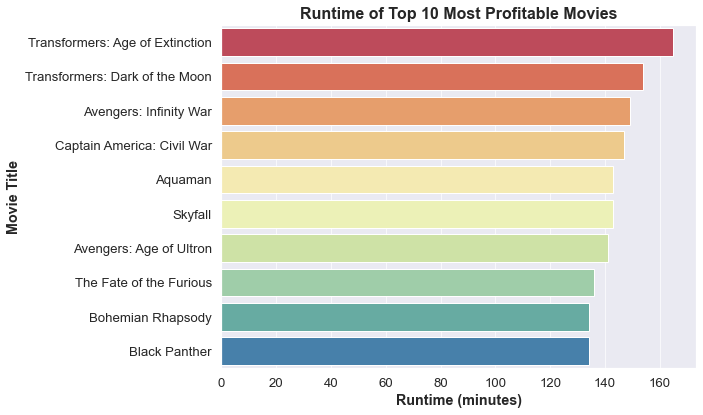

In [184]:
# Plot the runtime_minutes for the top most profitable movies
plt.figure(figsize=(10, 6))
sns.barplot(x='runtime_minutes', y='title', data=profitable_movies_runtime.head(10), orient='h', palette='Spectral')
plt.xlabel('Runtime (minutes)', fontweight='bold')
plt.ylabel('Movie Title', fontweight='bold')
plt.title('Runtime of Top 10 Most Profitable Movies', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.7)

plt.tight_layout()
plt.show()

## Conclusions

The movie industry is highly lucrative, earning the major studios hundreds of millions of dollars in profit. Despite the downward trend in the number of movie releases, the future of the industry remains promising as earnings continue to skyrocket.

The industry is currently dominated by 10 major studios whose movies are consistently among the highest-earning and most profitable. A portion of the success of these studios can be attributed to their ability to turn already existing stories such as comic books and movies into franchise films as well as make multiple sequels from their original creations enabling them to squeeze every last drop in earnings from those storylines.

The leading studios in the industry have done their homework, majorly focusing their productions of the most lucrative genres, Action, Adventure, Sci-Fi, Animation, and Comedy - a recipe for success. Additionally putting major focus on sequels and franchise productions enabling to capitalize on the development of one storyline.

The overseas market is critical for the success of any major film studio and thus must not be neglected.

## Business Recommendations

1. Conduct thorough market and competitor analysis as we have observed the market has been dominated by a select few studios namely, Walt Disney (BV), Universal Studios (Uni), Warner Bros (WB), Sony, and Fox. Given that numerous studios with years of experience have yet to dethrone the top 5 is an indicator of the mean feat that it is.

2. Hire talent from the top 5 studios who can guide the strategy and content creation.

3. Consider the foreign market - it has proven a major contributor to the success of the top 5 studios, especially Disney, the highest-earning studio from foreign gross earnings.

4. Develop storylines with longevity. Franchise films developed as comic book adaptations, Sci-Fi and fantasy films have become increasingly profitable over the years and are a great contributor to the success of other major studios.
5. Investment in the right technology is key. Almost every movie being released at the moment is 3D and includes a massive amount of CGI.

6. When it comes to runtime minutes it seems that nowadays, the longer the better. Studios appear to be giving audiences longer and longer movies possibly in response to audience feedback/demands.

7. It may be a viable option for Microsoft to invest in one of the more successful studios in the industry given that it is far less risky and guarantees Microsoft a decent form of return.

## Study Limitations

1. Given the structure of the data, the correlation between genre and earnings could not be established.
2. The data did not contain all original titles to enable comparative analysis with the succeeding sequels/franchise films.
3. We are unable to establish the impact of contributions towards earnings such as marketing, cast, and crew.

## Recommendations for Future Analysis

1. Effects of streaming sites on the movie industry
2. Genre as a contributor to the success of a film
3. Impact of studio name (brand), on the success of a film.